# <span style="color:blue"> Lending Club Case Study

### <span style="color:green"> First, let's import all necessary libraties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("loan.csv")
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### <span style="color:green"> First thing is to have a brief look at the data and the null values etc.

### <span style="color:green"> We can see that, there are a lot columns with all 0 values and those columns are of no use to use in our analysis.

### <span style="color:green"> We can thus, single them out and delete

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [4]:
null_list=df.columns[df.isnull().all()].to_list()

In [5]:
null_list

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [6]:
df.drop(null_list, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### <span style="color:green"> Now, we are left with much lesser columns

### <span style="color:green"> Also, we can see that some of those columns are having some NULL values in them. We have to clean/treat them before moving ahead

In [8]:
df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [9]:
df['emp_title'].nunique()

28820

### <span style="color:green"> emp_title is the Job Title of the borrower and thus, can be one important factor in the analysis. We cannot delete the column.

### <span style="color:green"> We cannot use mode here as there are too many titles. We can rather delete the rows having the null values for emp_title

In [10]:
df[df['emp_title'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
30,1032111,1261745,4375,4375,4375.0,36 months,7.51%,136.11,A,A3,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
42,1069314,1304202,3000,3000,3000.0,36 months,18.25%,108.84,D,D5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39700,98276,98268,5400,5400,200.0,36 months,7.75%,168.60,A,A3,...,NaN,Dec-13,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39704,93277,93254,3000,3000,950.0,36 months,8.70%,94.98,B,B1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39706,92676,92671,5000,5000,150.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [11]:
df.drop(df[df['emp_title'].isnull()].index, inplace=True)

### <span style="color:green"> Let's check the data frame again

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37258 entries, 1 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37258 non-null  int64  
 1   member_id                   37258 non-null  int64  
 2   loan_amnt                   37258 non-null  int64  
 3   funded_amnt                 37258 non-null  int64  
 4   funded_amnt_inv             37258 non-null  float64
 5   term                        37258 non-null  object 
 6   int_rate                    37258 non-null  object 
 7   installment                 37258 non-null  float64
 8   grade                       37258 non-null  object 
 9   sub_grade                   37258 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  37202 non-null  object 
 12  home_ownership              37258 non-null  object 
 13  annual_inc                  37258 no

In [13]:
df.columns[df.isnull().any()]

Index(['emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Let's deal with emp_length next (Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years)

In [14]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [15]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [16]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [17]:
df.columns[df.isnull().any()]

Index(['desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record',
       'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Let's deal with next feature desc (Loan description provided by the borrower)

In [18]:
df['desc'].head(10)

1       Borrower added on 12/22/11 > I plan to use t...
3       Borrower added on 12/21/11 > to pay for prop...
4       Borrower added on 12/21/11 > I plan on combi...
5                                                   NaN
6       Borrower added on 12/18/11 > I am planning o...
7       Borrower added on 12/16/11 > Downpayment for...
9       Borrower added on 12/16/11 > I'm trying to b...
10      Borrower added on 12/15/11 > I had recived a...
11                                                  NaN
12      Borrower added on 12/15/11 > Plan to pay off...
Name: desc, dtype: object

In [19]:
df['desc'].info()

<class 'pandas.core.series.Series'>
Index: 37258 entries, 1 to 39716
Series name: desc
Non-Null Count  Dtype 
--------------  ----- 
25171 non-null  object
dtypes: object(1)
memory usage: 582.2+ KB


### <span style="color:green"> This doesn't look like to add value to our analysis and also, there are so many missing values. It's better to drop the column

In [20]:
df = df.drop('desc',axis=1)

In [21]:
df.columns[df.isnull().any()]

Index(['title', 'mths_since_last_delinq', 'mths_since_last_record',
       'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Let's deal with next feature title (The loan title provided by the borrower)

In [22]:
df['title'].head(10)

1                                      bike
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
Name: title, dtype: object

In [23]:
df['title'].info()

<class 'pandas.core.series.Series'>
Index: 37258 entries, 1 to 39716
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
37249 non-null  object
dtypes: object(1)
memory usage: 582.2+ KB


In [24]:
df['title'].nunique()

18417

### <span style="color:green"> Like the previous column, this also doesn't look like to add any value to our analysis. It's better to drop the column

In [25]:
df = df.drop('title', axis=1)

In [26]:
df.columns[df.isnull().any()]

Index(['mths_since_last_delinq', 'mths_since_last_record', 'revol_util',
       'last_pymnt_d', 'next_pymnt_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Next variable/feature: mths_since_last_delinq (The number of months since the borrower's last delinquency)

In [27]:
df['mths_since_last_delinq'].info()

<class 'pandas.core.series.Series'>
Index: 37258 entries, 1 to 39716
Series name: mths_since_last_delinq
Non-Null Count  Dtype  
--------------  -----  
13197 non-null  float64
dtypes: float64(1)
memory usage: 582.2 KB


### <span style="color:green"> There are too many missing values in this feature. Though seems to be an important one, we cannot go ahead with this column due to so many missing data.

### <span style="color:green"> Some more such columns are mths_since_last_record (The number of months since the last public record) and next_pymnt_d (Next scheduled payment date)

### <span style="color:green"> The only logical thing to do is to delete these features.

In [28]:
df = df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)

In [29]:
df.columns[df.isnull().any()]

Index(['revol_util', 'last_pymnt_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Next variable to deal with is revol_util (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)

In [30]:
df['revol_util'].info()

<class 'pandas.core.series.Series'>
Index: 37258 entries, 1 to 39716
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
37212 non-null  object
dtypes: object(1)
memory usage: 582.2+ KB


In [31]:
df['revol_util'].nunique()

1082

### <span style="color:green"> There are a very less amount of missing data and we can delete the rows without losing much of information.

In [32]:
df.drop(df[df['revol_util'].isnull()].index, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37212 entries, 1 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37212 non-null  int64  
 1   member_id                   37212 non-null  int64  
 2   loan_amnt                   37212 non-null  int64  
 3   funded_amnt                 37212 non-null  int64  
 4   funded_amnt_inv             37212 non-null  float64
 5   term                        37212 non-null  object 
 6   int_rate                    37212 non-null  object 
 7   installment                 37212 non-null  float64
 8   grade                       37212 non-null  object 
 9   sub_grade                   37212 non-null  object 
 10  emp_title                   37212 non-null  object 
 11  emp_length                  37212 non-null  object 
 12  home_ownership              37212 non-null  object 
 13  annual_inc                  37212 no

In [34]:
df.columns[df.isnull().any()]

Index(['last_pymnt_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Next column is last_pymnt_d (Last month payment was received)

In [35]:
df['last_pymnt_d'].info()

<class 'pandas.core.series.Series'>
Index: 37212 entries, 1 to 39716
Series name: last_pymnt_d
Non-Null Count  Dtype 
--------------  ----- 
37152 non-null  object
dtypes: object(1)
memory usage: 581.4+ KB


In [36]:
df['last_pymnt_d'].unique()

array(['Apr-13', 'Jan-15', 'May-16', 'Nov-12', 'Jun-13', 'Sep-13',
       'Jul-12', 'Oct-13', 'May-13', 'Feb-15', 'Aug-15', 'Oct-12',
       'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13', 'Nov-13', 'Jan-14',
       'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12', 'Jul-14', 'Jul-13',
       'Jan-16', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12', 'Feb-13',
       'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13', 'Jun-14',
       'Feb-12', 'Mar-14', 'Apr-12', 'Sep-15', 'Nov-15', 'Mar-16',
       'Feb-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

### <span style="color:green"> Like the last column, there are a very less amount of missing data and we can delete the rows without losing much of information.

In [37]:
df.drop(df[df['last_pymnt_d'].isnull()].index, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37152 non-null  int64  
 1   member_id                   37152 non-null  int64  
 2   loan_amnt                   37152 non-null  int64  
 3   funded_amnt                 37152 non-null  int64  
 4   funded_amnt_inv             37152 non-null  float64
 5   term                        37152 non-null  object 
 6   int_rate                    37152 non-null  object 
 7   installment                 37152 non-null  float64
 8   grade                       37152 non-null  object 
 9   sub_grade                   37152 non-null  object 
 10  emp_title                   37152 non-null  object 
 11  emp_length                  37152 non-null  object 
 12  home_ownership              37152 non-null  object 
 13  annual_inc                  37152 no

In [39]:
df.columns[df.isnull().any()]

Index(['collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### <span style="color:green"> Next Feature: collections_12_mths_ex_med (Number of collections in 12 months excluding medical collections)

In [40]:
df['collections_12_mths_ex_med'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: collections_12_mths_ex_med
Non-Null Count  Dtype  
--------------  -----  
37105 non-null  float64
dtypes: float64(1)
memory usage: 580.5 KB


In [41]:
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [42]:
df['collections_12_mths_ex_med'].head(10)

1     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
9     0.0
10    0.0
11    0.0
12    0.0
Name: collections_12_mths_ex_med, dtype: float64

### <span style="color:green"> This Column contains all 0's and few Null values. We can easily delete this column

In [43]:
df = df.drop('collections_12_mths_ex_med', axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        37152 non-null  int64  
 1   member_id                 37152 non-null  int64  
 2   loan_amnt                 37152 non-null  int64  
 3   funded_amnt               37152 non-null  int64  
 4   funded_amnt_inv           37152 non-null  float64
 5   term                      37152 non-null  object 
 6   int_rate                  37152 non-null  object 
 7   installment               37152 non-null  float64
 8   grade                     37152 non-null  object 
 9   sub_grade                 37152 non-null  object 
 10  emp_title                 37152 non-null  object 
 11  emp_length                37152 non-null  object 
 12  home_ownership            37152 non-null  object 
 13  annual_inc                37152 non-null  float64
 14  verificatio

In [45]:
df.columns[df.isnull().any()]

Index(['chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'], dtype='object')

### <span style="color:green"> Next, let's examine column chargeoff_within_12_mths (Number of charge-offs within 12 months)

In [46]:
df['chargeoff_within_12_mths'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: chargeoff_within_12_mths
Non-Null Count  Dtype  
--------------  -----  
37105 non-null  float64
dtypes: float64(1)
memory usage: 580.5 KB


In [47]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

### <span style="color:green"> Like the previous columns, this column also is having all 0's in it apart from few Null values. Column can thus be deleted.

In [48]:
df = df.drop('chargeoff_within_12_mths', axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37152 non-null  int64  
 1   member_id                37152 non-null  int64  
 2   loan_amnt                37152 non-null  int64  
 3   funded_amnt              37152 non-null  int64  
 4   funded_amnt_inv          37152 non-null  float64
 5   term                     37152 non-null  object 
 6   int_rate                 37152 non-null  object 
 7   installment              37152 non-null  float64
 8   grade                    37152 non-null  object 
 9   sub_grade                37152 non-null  object 
 10  emp_title                37152 non-null  object 
 11  emp_length               37152 non-null  object 
 12  home_ownership           37152 non-null  object 
 13  annual_inc               37152 non-null  float64
 14  verification_status      37

In [50]:
df.columns[df.isnull().any()]

Index(['pub_rec_bankruptcies', 'tax_liens'], dtype='object')

### <span style="color:green"> Let's examine the column pub_rec_bankruptcies (Number of public record bankruptcies) next

In [51]:
df['pub_rec_bankruptcies'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
36498 non-null  float64
dtypes: float64(1)
memory usage: 580.5 KB


In [52]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [53]:
df['pub_rec_bankruptcies'].nunique()

3

### <span style="color:green"> For this column, we can replace the missing values with the Mode

In [54]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0],inplace=True)

In [55]:
df.columns[df.isnull().any()]

Index(['tax_liens'], dtype='object')

### <span style="color:green"> Only remaining feature with Null values now is tax_liens (Number of tax liens)

In [56]:
df['tax_liens'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: tax_liens
Non-Null Count  Dtype  
--------------  -----  
37120 non-null  float64
dtypes: float64(1)
memory usage: 580.5 KB


In [57]:
df['tax_liens'].unique()

array([ 0., nan])

### <span style="color:green"> This column contains only 0's and few Null values. Can be deleted.

In [58]:
df = df.drop('tax_liens', axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37152 non-null  int64  
 1   member_id                37152 non-null  int64  
 2   loan_amnt                37152 non-null  int64  
 3   funded_amnt              37152 non-null  int64  
 4   funded_amnt_inv          37152 non-null  float64
 5   term                     37152 non-null  object 
 6   int_rate                 37152 non-null  object 
 7   installment              37152 non-null  float64
 8   grade                    37152 non-null  object 
 9   sub_grade                37152 non-null  object 
 10  emp_title                37152 non-null  object 
 11  emp_length               37152 non-null  object 
 12  home_ownership           37152 non-null  object 
 13  annual_inc               37152 non-null  float64
 14  verification_status      37

### <span style="color:blue"> Now, we are left with 49 columns and 37152 rows

### <span style="color:green"> Let's next check if we have any rows having all 0's. The rows can be deleted as well.

In [60]:
df[(df==0).all(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


### <span style="color:green"> Well, there are no such rows.

### <span style="color:green"> Let's now check if the features need any data type modifications

In [61]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

### <span style="color:green">  We will remove 'months' and make it interger

In [62]:
def remove_char(x):
    return int(x.strip().split(' ')[0])

In [63]:
df['term'] = df['term'].apply(remove_char)

In [64]:
df['term'].unique()

array([60, 36], dtype=int64)

In [65]:
df['term'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
37152 non-null  int64
dtypes: int64(1)
memory usage: 580.5 KB


In [66]:
df['int_rate'].unique()

array(['15.27%', '13.49%', '12.69%', '7.90%', '15.96%', '18.64%',
       '14.65%', '9.91%', '10.65%', '16.29%', '6.03%', '11.71%', '12.42%',
       '16.77%', '8.90%', '7.51%', '6.62%', '19.91%', '17.27%', '14.27%',
       '21.28%', '17.58%', '21.67%', '19.42%', '22.06%', '20.89%',
       '18.25%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '15.99%', '16.49%',
       '6.99%', '12.99%', '15.23%', '14.79%', '8.49%', '5.42%', '17.49%',
       '10.59%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '16.59%', '17.19%', '12.87%',
       '20.69%', '9.67%', '21.82%', '19.79%', '18.49%', '13.84%',
       '22.94%', '

### <span style="color:green"> We can remove % and make it float

In [67]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.rstrip('%')))

In [68]:
df['int_rate'].unique()

array([15.27, 13.49, 12.69,  7.9 , 15.96, 18.64, 14.65,  9.91, 10.65,
       16.29,  6.03, 11.71, 12.42, 16.77,  8.9 ,  7.51,  6.62, 19.91,
       17.27, 14.27, 21.28, 17.58, 21.67, 19.42, 22.06, 20.89, 18.25,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  8.49,  5.42, 17.49, 10.59,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49, 13.84,
       22.94, 24.4 , 21.48, 14.82, 17.88, 20.11, 16.02, 17.51, 13.06,
       14.91, 15.28, 17.14, 13.43, 11.11, 10.37, 14.17, 16.4 , 15.65,
        7.66, 10.  , 10.74,  7.29,  5.79,  6.92,  9.63, 14.54, 12.68,
       18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74, 20.48,
        6.91, 12.23,

In [69]:
df['int_rate'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
37152 non-null  float64
dtypes: float64(1)
memory usage: 580.5 KB


### <span style="color:green"> Let's check some other variables one after the other

In [70]:
df['grade'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: grade
Non-Null Count  Dtype 
--------------  ----- 
37152 non-null  object
dtypes: object(1)
memory usage: 580.5+ KB


In [71]:
df['grade'].unique()

array(['C', 'B', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [72]:
df['sub_grade'].unique()

array(['C4', 'C1', 'B5', 'A4', 'C5', 'E1', 'C3', 'B1', 'B2', 'D1', 'A1',
       'B3', 'B4', 'D2', 'A5', 'A3', 'A2', 'E4', 'D3', 'C2', 'F2', 'D4',
       'F3', 'E3', 'F4', 'F1', 'D5', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [73]:
df['emp_title'].unique()

array(['Ryder', 'AIR RESOURCES BOARD', 'University Medical Group', ...,
       'FiSite Research', 'Squarewave Solutions, Ltd.',
       'Evergreen Center'], dtype=object)

In [74]:
df['emp_title'].nunique()

28734

In [75]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [76]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [77]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [78]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

### <span style="color:green"> We can do 2 things for this column. Change the column name to "issued" and separate month/year

In [79]:
df.rename(columns={'issue_d':'issued'}, inplace=True)

In [80]:
df['issued_month'] = df['issued'].apply(lambda x: x.split('-')[0])
df['issued_year'] = df['issued'].apply(lambda x: x.split('-')[1])
df['issued_year'] = df['issued_year'].apply(lambda x: '20'+ x)

In [81]:
df['issued_month'].head()

1    Dec
3    Dec
4    Dec
5    Dec
6    Dec
Name: issued_month, dtype: object

In [82]:
df['issued_year'].head()

1    2011
3    2011
4    2011
5    2011
6    2011
Name: issued_year, dtype: object

In [83]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [84]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

### <span style="color:red"> The column 'pymnt_plan' has a singular value. It's of no use for our analysis. We can drop it.

In [85]:
df = df.drop('pymnt_plan', axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37152 non-null  int64  
 1   member_id                37152 non-null  int64  
 2   loan_amnt                37152 non-null  int64  
 3   funded_amnt              37152 non-null  int64  
 4   funded_amnt_inv          37152 non-null  float64
 5   term                     37152 non-null  int64  
 6   int_rate                 37152 non-null  float64
 7   installment              37152 non-null  float64
 8   grade                    37152 non-null  object 
 9   sub_grade                37152 non-null  object 
 10  emp_title                37152 non-null  object 
 11  emp_length               37152 non-null  object 
 12  home_ownership           37152 non-null  object 
 13  annual_inc               37152 non-null  float64
 14  verification_status      37

In [87]:
df['url'].unique()

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1076863',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1075358',
       ...,
       'https://lendingclub.com/browse/loanDetail.action?loan_id=92187',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90665',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=87023'],
      dtype=object)

In [88]:
df['purpose'].unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [89]:
df['zip_code'].head(10)

1     309xx
3     917xx
4     972xx
5     852xx
6     280xx
7     900xx
9     774xx
10    853xx
11    913xx
12    245xx
Name: zip_code, dtype: object

In [90]:
df['addr_state'].unique()

array(['GA', 'CA', 'OR', 'AZ', 'NC', 'TX', 'VA', 'IL', 'MO', 'CT', 'UT',
       'FL', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'NY',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'SD', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [91]:
df['earliest_cr_line'].head(10)

1     Apr-99
3     Feb-96
4     Jan-96
5     Nov-04
6     Jul-05
7     Jan-07
9     Sep-04
10    Jan-98
11    Oct-89
12    Apr-04
Name: earliest_cr_line, dtype: object

### <span style="color:green"> We can separate month/year for this column as well. Also, we will rewrite the year for readability.

In [92]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[0])
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[1])

In [93]:
df['earliest_cr_line_month'].head()

1    Apr
3    Feb
4    Jan
5    Nov
6    Jul
Name: earliest_cr_line_month, dtype: object

In [94]:
df['earliest_cr_line_year'].unique()

array(['99', '96', '04', '05', '07', '98', '89', '03', '91', '93', '01',
       '97', '83', '85', '02', '84', '06', '81', '00', '94', '95', '92',
       '86', '90', '88', '80', '08', '73', '79', '87', '82', '78', '71',
       '72', '70', '69', '75', '76', '77', '68', '74', '67', '65', '63',
       '66', '62', '56', '46', '50', '64', '54'], dtype=object)

In [95]:
ts = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']

In [96]:
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].apply(lambda x: '20'+ x if x in ts else '19' + x)

In [97]:
df['earliest_cr_line_year'].unique()

array(['1999', '1996', '2004', '2005', '2007', '1998', '1989', '2003',
       '1991', '1993', '2001', '1997', '1983', '1985', '2002', '1984',
       '2006', '1981', '2000', '1994', '1995', '1992', '1986', '1990',
       '1988', '1980', '2008', '1973', '1979', '1987', '1982', '1978',
       '1971', '1972', '1970', '1969', '1975', '1976', '1977', '1968',
       '1974', '1967', '1965', '1963', '1966', '1962', '1956', '1946',
       '1950', '1964', '1954'], dtype=object)

In [98]:
df['revol_util'].head()

1     9.40%
3       21%
4    53.90%
5    28.30%
6    85.60%
Name: revol_util, dtype: object

### <span style="color:green"> Let's remove %age from this column

In [99]:
df['revol_util'] = df['revol_util'].apply(lambda x: float(x.rstrip('%')))

In [100]:
df['revol_util'].head()

1     9.4
3    21.0
4    53.9
5    28.3
6    85.6
Name: revol_util, dtype: float64

In [101]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

### <span style="color:green"> This column has a single value in it and thus, not useful for analysis. We can drop the column.

In [102]:
df = df.drop('initial_list_status', axis=1)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37152 non-null  int64  
 1   member_id                37152 non-null  int64  
 2   loan_amnt                37152 non-null  int64  
 3   funded_amnt              37152 non-null  int64  
 4   funded_amnt_inv          37152 non-null  float64
 5   term                     37152 non-null  int64  
 6   int_rate                 37152 non-null  float64
 7   installment              37152 non-null  float64
 8   grade                    37152 non-null  object 
 9   sub_grade                37152 non-null  object 
 10  emp_title                37152 non-null  object 
 11  emp_length               37152 non-null  object 
 12  home_ownership           37152 non-null  object 
 13  annual_inc               37152 non-null  float64
 14  verification_status      37

In [104]:
df['last_pymnt_d'].head()

1    Apr-13
3    Jan-15
4    May-16
5    Jan-15
6    May-16
Name: last_pymnt_d, dtype: object

### <span style="color:green"> We can separate month/year for this column. Also, we will rewrite the year for readability.

In [105]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].apply(lambda x: x.split('-')[0])
df['last_pymnt_d_year'] = df['last_pymnt_d'].apply(lambda x: x.split('-')[1])

In [106]:
df['last_pymnt_d_month'].head()

1    Apr
3    Jan
4    May
5    Jan
6    May
Name: last_pymnt_d_month, dtype: object

In [107]:
df['last_pymnt_d_year'].unique()

array(['13', '15', '16', '12', '14', '11', '10', '09', '08'], dtype=object)

In [108]:
df['last_pymnt_d_year'] = df['last_pymnt_d_year'].apply(lambda x: '20'+ x)

In [109]:
df['last_pymnt_d_year'].unique()

array(['2013', '2015', '2016', '2012', '2014', '2011', '2010', '2009',
       '2008'], dtype=object)

In [110]:
df['last_credit_pull_d']

1        Sep-13
3        Apr-16
4        May-16
5        Jan-16
6        May-16
          ...  
39710    Jun-07
39711    Nov-14
39712    Jun-10
39713    Jul-10
39716    Jun-10
Name: last_credit_pull_d, Length: 37152, dtype: object

### <span style="color:green"> We can separate month/year for this column. Also, we will rewrite the year for readability.

In [111]:
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].apply(lambda x: x.split('-')[0])
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].apply(lambda x: x.split('-')[1])

In [112]:
df['last_credit_pull_d_month'].head()

1    Sep
3    Apr
4    May
5    Jan
6    May
Name: last_credit_pull_d_month, dtype: object

In [113]:
df['last_credit_pull_d_year'].unique()

array(['13', '16', '14', '15', '12', '11', '10', '09', '08', '07'],
      dtype=object)

In [114]:
df['last_credit_pull_d_year'] = df['last_credit_pull_d_year'].apply(lambda x: '20'+ x)

In [115]:
df['last_credit_pull_d_year'].unique()

array(['2013', '2016', '2014', '2015', '2012', '2011', '2010', '2009',
       '2008', '2007'], dtype=object)

In [116]:
df['application_type'].head()

1    INDIVIDUAL
3    INDIVIDUAL
4    INDIVIDUAL
5    INDIVIDUAL
6    INDIVIDUAL
Name: application_type, dtype: object

In [117]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

### <span style="color:green"> This column has a single value in it and thus can be dropped.

In [118]:
df = df.drop('application_type',axis=1)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        37152 non-null  int64  
 1   member_id                 37152 non-null  int64  
 2   loan_amnt                 37152 non-null  int64  
 3   funded_amnt               37152 non-null  int64  
 4   funded_amnt_inv           37152 non-null  float64
 5   term                      37152 non-null  int64  
 6   int_rate                  37152 non-null  float64
 7   installment               37152 non-null  float64
 8   grade                     37152 non-null  object 
 9   sub_grade                 37152 non-null  object 
 10  emp_title                 37152 non-null  object 
 11  emp_length                37152 non-null  object 
 12  home_ownership            37152 non-null  object 
 13  annual_inc                37152 non-null  float64
 14  verificatio

### <span style="color:red"> We have taken care of Null/Missing values

### <span style="color:red"> Also, we have taken care of data types & splitted few columns to make new ones which will be beneficial for the analysis

## <span style="color:blue"> Next, we have to analyze the features

### <span style="color:green"> Univariate Analysis

### <span style="color:green"> Before anything else, to make things easier, let's split the dataset into 2 (one for numeric and other for categorical variables)

In [120]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

In [121]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37152 non-null  int64  
 1   member_id                37152 non-null  int64  
 2   loan_amnt                37152 non-null  int64  
 3   funded_amnt              37152 non-null  int64  
 4   funded_amnt_inv          37152 non-null  float64
 5   term                     37152 non-null  int64  
 6   int_rate                 37152 non-null  float64
 7   installment              37152 non-null  float64
 8   annual_inc               37152 non-null  float64
 9   dti                      37152 non-null  float64
 10  delinq_2yrs              37152 non-null  int64  
 11  inq_last_6mths           37152 non-null  int64  
 12  open_acc                 37152 non-null  int64  
 13  pub_rec                  37152 non-null  int64  
 14  revol_bal                37

In [122]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   grade                     37152 non-null  object
 1   sub_grade                 37152 non-null  object
 2   emp_title                 37152 non-null  object
 3   emp_length                37152 non-null  object
 4   home_ownership            37152 non-null  object
 5   verification_status       37152 non-null  object
 6   issued                    37152 non-null  object
 7   loan_status               37152 non-null  object
 8   url                       37152 non-null  object
 9   purpose                   37152 non-null  object
 10  zip_code                  37152 non-null  object
 11  addr_state                37152 non-null  object
 12  earliest_cr_line          37152 non-null  object
 13  last_pymnt_d              37152 non-null  object
 14  last_credit_pull_d        3

### <span style="color:green"> Univariate Analysis for Numeric Variables

In [123]:
pd.options.display.max_columns = 50
dfn.describe(include = 'all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.715200e+04,3.715200e+04,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,3.715200e+04,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.000000,37152.0,37152.0,37152.0,37152.000000
mean,6.824772e+05,8.495549e+05,11282.064223,11009.697325,10451.558383,42.505168,12.048491,326.070027,6.926637e+04,13.398852,0.147152,0.867813,9.350991,0.053456,13462.501157,49.155173,22.187931,51.533802,51.286307,12269.822920,11671.431092,9886.635191,2289.116639,1.339479,92.731692,11.760063,2720.281175,1.0,0.0,0.0,0.040752
std,2.107507e+05,2.659951e+05,7418.376794,7153.710011,7098.130897,10.668172,3.715893,207.433510,6.419245e+04,6.653181,0.493791,1.066746,4.392437,0.234551,15745.913092,28.217778,11.382767,376.559089,375.166631,9018.293898,8922.109714,7035.561347,2612.539243,7.233942,680.518659,140.925102,4454.529812,0.0,0.0,0.0,0.198667
min,5.574200e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,5.161545e+05,6.666318e+05,5600.000000,5500.000000,5000.000000,36.000000,9.320000,168.670000,4.160000e+04,8.310000,0.000000,0.000000,6.000000,0.000000,3810.000000,26.000000,14.000000,0.000000,0.000000,5656.389458,5228.572500,4800.000000,676.950000,0.000000,0.000000,0.000000,224.740000,1.0,0.0,0.0,0.000000
50%,6.643465e+05,8.491980e+05,10000.000000,10000.000000,9000.000000,36.000000,11.860000,283.280000,6.000000e+04,13.500000,0.000000,1.000000,9.000000,0.000000,9005.000000,49.700000,21.000000,0.000000,0.000000,10074.357015,9428.225000,8026.770000,1375.905000,0.000000,0.000000,0.000000,564.360000,1.0,0.0,0.0,0.000000
75%,8.372630e+05,1.047008e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,432.122500,8.300000e+04,18.650000,0.000000,1.000000,12.000000,0.000000,17215.000000,72.600000,29.000000,0.000000,0.000000,16651.622270,15928.490000,13908.970000,2866.592500,0.000000,0.000000,0.000000,3412.667500,1.0,0.0,0.0,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


<Axes: ylabel='loan_amnt'>

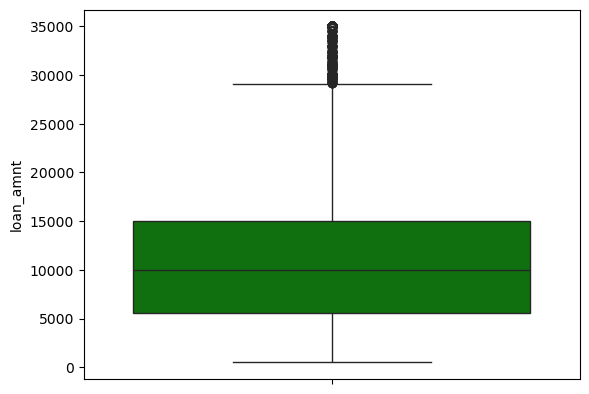

In [124]:
sns.boxplot(data=dfn, y= 'loan_amnt', color='green')

<Axes: ylabel='funded_amnt'>

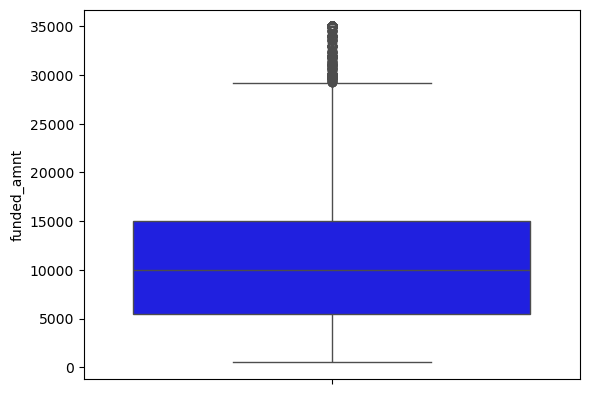

In [125]:
sns.boxplot(data=dfn, y= 'funded_amnt', color='blue')

<Axes: ylabel='term'>

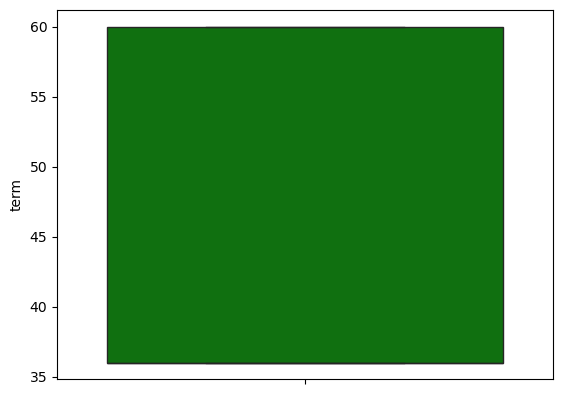

In [126]:
sns.boxplot(data=dfn, y= 'term', color='green')

In [127]:
df['term'].unique()

array([60, 36], dtype=int64)

### <span style="color:green"> Variable "term" is more of a categorical variable.

In [128]:
df['term']=df['term'].astype('object')

In [129]:
df['term'].info()

<class 'pandas.core.series.Series'>
Index: 37152 entries, 1 to 39716
Series name: term
Non-Null Count  Dtype 
--------------  ----- 
37152 non-null  object
dtypes: object(1)
memory usage: 580.5+ KB


In [130]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

In [131]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37152 entries, 1 to 39716
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37152 non-null  int64  
 1   member_id                37152 non-null  int64  
 2   loan_amnt                37152 non-null  int64  
 3   funded_amnt              37152 non-null  int64  
 4   funded_amnt_inv          37152 non-null  float64
 5   int_rate                 37152 non-null  float64
 6   installment              37152 non-null  float64
 7   annual_inc               37152 non-null  float64
 8   dti                      37152 non-null  float64
 9   delinq_2yrs              37152 non-null  int64  
 10  inq_last_6mths           37152 non-null  int64  
 11  open_acc                 37152 non-null  int64  
 12  pub_rec                  37152 non-null  int64  
 13  revol_bal                37152 non-null  int64  
 14  revol_util               37

<Axes: ylabel='int_rate'>

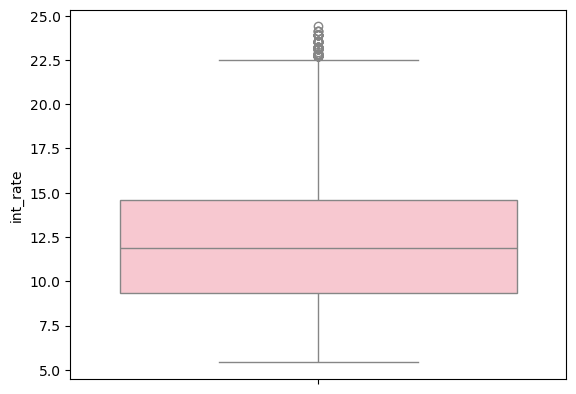

In [132]:
sns.boxplot(data=dfn, y= 'int_rate', color='pink')

<Axes: ylabel='annual_inc'>

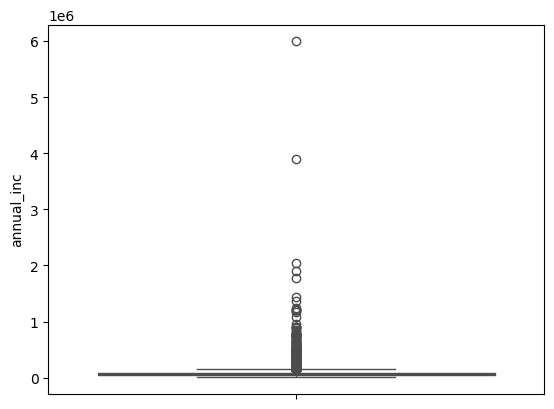

In [133]:
sns.boxplot(data=dfn, y= 'annual_inc', color='blue')

### <span style="color:green"> Outliers are present in variable "annual_inc". We will apply IQR method to find them.

In [134]:
    t25 =  df['annual_inc'].quantile(0.25)
    t75 =  df['annual_inc'].quantile(0.75)
    iqr = t75 - t25
    
    print(t25)
    print(t75)
    print(iqr)

41600.0
83000.0
41400.0


In [135]:
lr = t25 - (1.5 * iqr) # Lower Range
ur = t75 + (1.5 * iqr) # Upper range

print(lr)
print(ur)

-20500.0
145100.0


In [136]:
df[df['annual_inc'] > ur]['annual_inc'].count()

1665

In [137]:
df[df['annual_inc'] < lr]['annual_inc'].count()

0

### <span style="color:green"> We will delete the outliers for this column

In [138]:
df = df[df['annual_inc'] < ur]

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35487 entries, 1 to 39716
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        35487 non-null  int64  
 1   member_id                 35487 non-null  int64  
 2   loan_amnt                 35487 non-null  int64  
 3   funded_amnt               35487 non-null  int64  
 4   funded_amnt_inv           35487 non-null  float64
 5   term                      35487 non-null  object 
 6   int_rate                  35487 non-null  float64
 7   installment               35487 non-null  float64
 8   grade                     35487 non-null  object 
 9   sub_grade                 35487 non-null  object 
 10  emp_title                 35487 non-null  object 
 11  emp_length                35487 non-null  object 
 12  home_ownership            35487 non-null  object 
 13  annual_inc                35487 non-null  float64
 14  verificatio

In [140]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

<Axes: ylabel='annual_inc'>

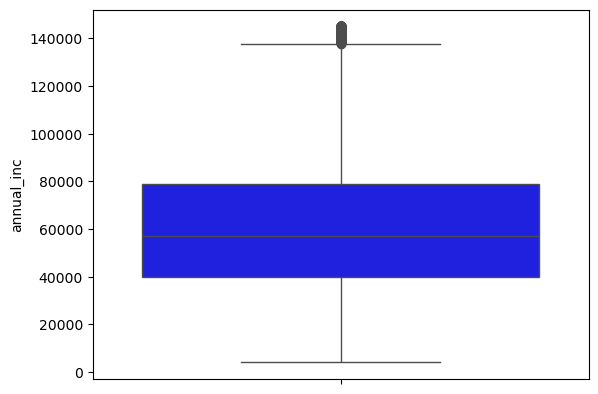

In [141]:
sns.boxplot(data=dfn, y= 'annual_inc', color='blue')

### <span style="color:green">  This looks ok now

### <span style="color:green">  Let's define function for finding IQR

In [142]:
def find_iqr(df,col):
    try:
        t25 =  df[col].quantile(0.25)
        t75 =  df[col].quantile(0.75)
        iqr = t75 - t25
        
        print(f'25th Percentile of {col} is {t25}')
        print(f'75th Percentile of {col} is {t75}')
        print(f'IQR of {col} is {iqr}')
        
        
        lr = t25 - (1.5 * iqr) # Lower Range
        ur = t75 + (1.5 * iqr) # Upper range
        
        print(f'Lower Range for {col} {lr}')
        print(f'Upper Range for {col} {ur}')
        
        return [True, lr, ur]
    except Exception as e:
        print(f'Some Error {e}')
        return False


<Axes: ylabel='installment'>

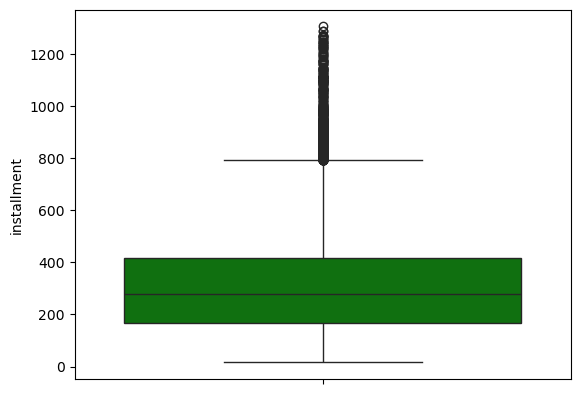

In [143]:
sns.boxplot(data=dfn, y= 'installment', color='green')

In [144]:
l = find_iqr(df,'installment')

25th Percentile of installment is 165.88
75th Percentile of installment is 415.74
IQR of installment is 249.86
Lower Range for installment -208.91000000000003
Upper Range for installment 790.53


In [145]:
l

[True, -208.91000000000003, 790.53]

In [146]:
df[df['installment'] > l[2]]['installment'].count()

1250

In [147]:
df[df['installment'] < l[1]]['installment'].count()

0

In [148]:
df = df[df['installment'] < l[2]]

<Axes: ylabel='installment'>

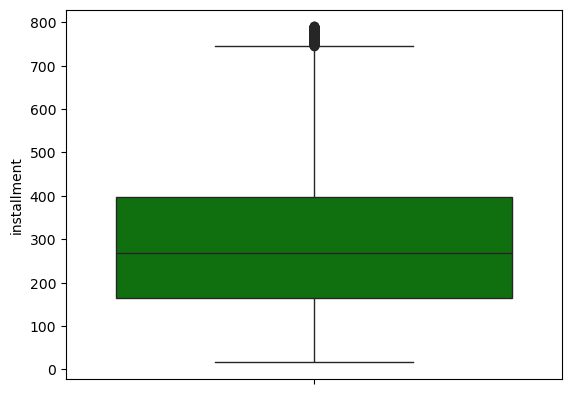

In [149]:
sns.boxplot(data=df, y= 'installment', color='green')

### <span style="color:green">  This looks ok now

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34237 entries, 1 to 39716
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        34237 non-null  int64  
 1   member_id                 34237 non-null  int64  
 2   loan_amnt                 34237 non-null  int64  
 3   funded_amnt               34237 non-null  int64  
 4   funded_amnt_inv           34237 non-null  float64
 5   term                      34237 non-null  object 
 6   int_rate                  34237 non-null  float64
 7   installment               34237 non-null  float64
 8   grade                     34237 non-null  object 
 9   sub_grade                 34237 non-null  object 
 10  emp_title                 34237 non-null  object 
 11  emp_length                34237 non-null  object 
 12  home_ownership            34237 non-null  object 
 13  annual_inc                34237 non-null  float64
 14  verificatio

In [151]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

<Axes: ylabel='dti'>

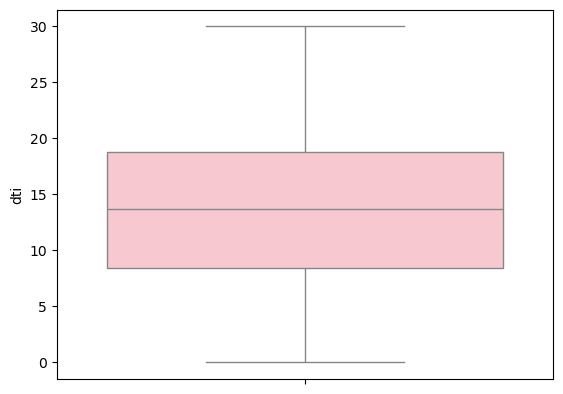

In [152]:
sns.boxplot(data=dfn, y= 'dti', color='pink')

<Axes: ylabel='delinq_2yrs'>

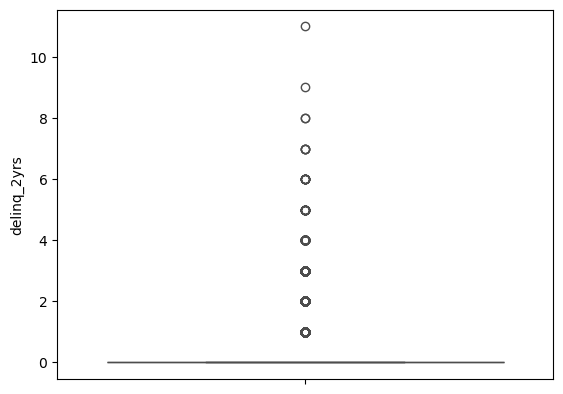

In [153]:
sns.boxplot(data=dfn, y= 'delinq_2yrs', color='blue')

### <span style="color:green">  The column 'delinq_2yrs' has a lot of outliers too. We will treat it the same way.

In [154]:
l = find_iqr(df,'delinq_2yrs')

25th Percentile of delinq_2yrs is 0.0
75th Percentile of delinq_2yrs is 0.0
IQR of delinq_2yrs is 0.0
Lower Range for delinq_2yrs 0.0
Upper Range for delinq_2yrs 0.0


In [155]:
l

[True, 0.0, 0.0]

In [156]:
df['delinq_2yrs'].describe()

count    34237.000000
mean         0.146070
std          0.494877
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [157]:
df['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

### <span style="color:green">  This is more of a categorical variable. Let's change the dtype

In [158]:
df['delinq_2yrs'] = df['delinq_2yrs'].astype('object')

In [159]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

In [160]:
dfn.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.423700e+04,3.423700e+04,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.0,34237.0,34237.0,34237.000000
mean,6.807441e+05,8.474886e+05,10313.145135,10049.506382,9560.290657,11.902062,295.869982,60785.532060,13.528339,0.857756,9.198732,0.055612,12129.704121,48.860538,21.600199,45.410984,45.175349,11163.592077,10633.272131,9037.010898,2045.277581,1.235835,80.067842,9.694511,2467.496060,1.0,0.0,0.0,0.042352
std,2.100875e+05,2.653913e+05,6374.462936,6055.166199,6040.820175,3.645014,168.599399,27427.542143,6.652140,1.055384,4.328949,0.238787,13361.299791,28.137267,11.150700,330.871524,329.478654,7678.354452,7622.373014,6012.447066,2232.013474,6.491207,573.649621,114.955695,3951.626881,0.0,0.0,0.0,0.202262
min,5.574200e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,1.0,0.0,0.0,0.000000
25%,5.165060e+05,6.672110e+05,5000.000000,5000.000000,5000.000000,8.940000,163.520000,40000.000000,8.450000,0.000000,6.000000,0.000000,3623.000000,25.800000,13.000000,0.000000,0.000000,5490.586946,5018.590000,4500.000000,642.870000,0.000000,0.000000,0.000000,215.220000,1.0,0.0,0.0,0.000000
50%,6.613290e+05,8.455590e+05,9200.000000,9000.000000,8375.000000,11.710000,268.320000,55920.000000,13.650000,1.000000,8.000000,0.000000,8522.000000,49.200000,20.000000,0.000000,0.000000,9427.356129,8886.950000,8000.000000,1277.600000,0.000000,0.000000,0.000000,514.050000,1.0,0.0,0.0,0.000000
75%,8.336630e+05,1.042952e+06,14400.000000,14000.000000,13000.000000,14.270000,396.470000,76365.000000,18.800000,1.000000,12.000000,0.000000,15942.000000,72.100000,28.000000,0.000000,0.000000,15277.840000,14630.260000,12175.000000,2561.570000,0.000000,0.000000,0.000000,3177.540000,1.0,0.0,0.0,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,790.490000,145008.000000,29.990000,8.000000,42.000000,4.000000,149000.000000,99.900000,90.000000,5286.980000,5283.190000,47367.629920,46668.720000,35000.000000,17704.040000,165.690000,29623.350000,5569.920000,35339.050000,1.0,0.0,0.0,2.000000


### <span style="color:green">  Can see similar distribution for few other features like 'inq_last_6mths', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'policy_code', 'acc_now_delinq', 'delinq_amnt' and 'pub_rec_bankruptcies'

In [161]:
dfn['inq_last_6mths'].unique()

array([5, 1, 0, 3, 2, 4, 6, 7, 8], dtype=int64)

In [162]:
dfn['pub_rec'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [163]:
dfn['out_prncp'].unique()

array([   0.  ,  524.06, 1849.1 , 2181.42, 2637.34, 3125.79, 1041.99,
       3033.28, 1941.27, 2235.1 , 3009.73, 3572.17, 2168.19, 3282.  ,
       3578.62, 4860.84, 3500.97, 3730.24, 3467.1 ,  584.28, 2733.54,
       2851.4 ,  775.8 , 2789.32, 4305.61, 3135.62, 2399.66, 2245.8 ,
       2410.09, 1998.59, 1512.19, 2970.39,  498.84, 2963.24, 3547.11,
        612.96, 3916.99, 2088.78, 1262.94, 1311.75, 3293.77, 3175.31,
       4337.79, 2977.79, 1795.27, 1608.01, 2468.75, 2366.06, 1263.01,
       1841.1 , 1880.75, 2197.15, 1143.7 , 2139.9 , 3307.37, 3506.46,
       2393.54,  757.34, 3247.37, 2441.54, 3795.57, 2069.09,  829.39,
       1634.83, 1128.52, 2169.29, 4064.35, 3399.59, 1393.68, 2835.14,
       2888.66, 4049.43, 2158.43, 1551.4 , 3816.06, 3242.49, 3284.78,
       1990.89, 3426.68, 3373.38, 1913.37, 1202.1 , 3298.03,  952.95,
       2429.04, 1918.47, 3393.3 ,  815.07, 4448.53, 3541.14, 3247.14,
       1323.48, 2988.98, 1828.12, 3449.06, 4124.43, 1717.73, 5217.87,
       3357.63, 1146

In [164]:
dfn['out_prncp_inv'].unique()

array([   0.  ,  524.06, 1844.43, 2177.03, 2632.59, 3120.68, 1041.99,
       3033.28, 1897.5 , 2178.56, 3009.73, 3567.34, 2168.19, 3277.36,
       3569.68, 4855.89, 3500.97, 3725.49, 3467.1 ,  584.28, 2733.54,
       2847.01,  775.8 , 2785.39, 4301.26, 3131.63, 2395.9 , 2242.04,
       2410.09, 1994.24, 1512.19, 2966.01,  498.84, 2963.24, 3547.11,
        610.88, 3916.99, 2088.78, 1262.94, 1311.75, 3289.97, 3171.55,
       4337.79, 2977.79, 1795.27, 1608.01, 2468.75, 2366.06, 1263.01,
       1841.1 , 1880.75, 2197.15, 1143.7 , 2139.9 , 3307.37, 3502.02,
       2393.54,  757.34, 3247.37, 2437.99, 3791.22, 2069.09,  829.39,
       1634.83, 1128.52, 2166.81, 4064.35, 3395.31, 1388.76, 2835.14,
       2888.66, 4044.6 , 2158.43, 1546.95, 3816.06, 3242.49, 3284.78,
       1990.89, 3422.81, 3373.38, 1913.37, 1202.1 , 3298.03,  952.95,
       2429.04, 1911.33, 3393.3 ,  815.07, 4444.15, 3541.14, 3243.04,
       1323.48, 2981.46, 1828.12, 3449.06, 4116.84, 1717.73, 5214.11,
       3353.75, 1146

<Axes: ylabel='out_prncp'>

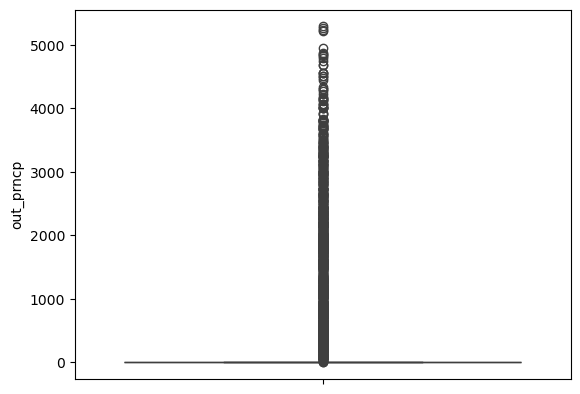

In [165]:
sns.boxplot(data=dfn, y='out_prncp')

<Axes: ylabel='out_prncp_inv'>

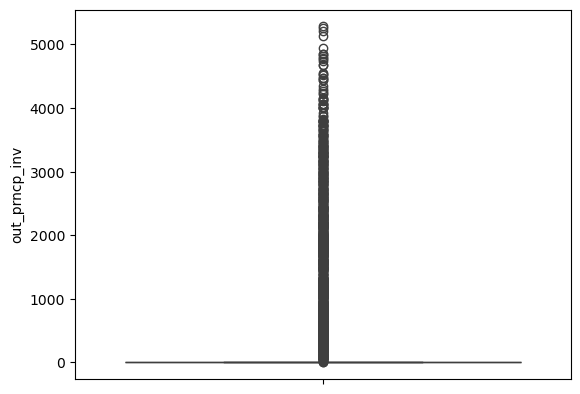

In [166]:
sns.boxplot(data=df, y='out_prncp_inv')

### <span style="color:green">  Columns 'out_prncp', 'out_prncp_inv' are having huge outliers

In [167]:
l = find_iqr(df, 'out_prncp')

25th Percentile of out_prncp is 0.0
75th Percentile of out_prncp is 0.0
IQR of out_prncp is 0.0
Lower Range for out_prncp 0.0
Upper Range for out_prncp 0.0


In [168]:
l

[True, 0.0, 0.0]

In [169]:
df[df['out_prncp'] > l[2]]['out_prncp'].count()

951

In [170]:
df[df['out_prncp'] < l[1]]['out_prncp'].count()

0

<Axes: xlabel='out_prncp', ylabel='Count'>

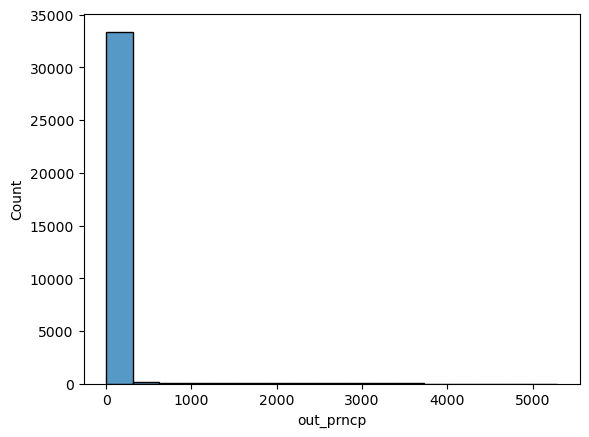

In [171]:
sns.histplot(data=df, x='out_prncp')

### <span style="color:green">  We will maintain a parallel DF from here on, for comparison purposes

In [172]:
df1 = df[df['out_prncp'] <= l[2]]

<Axes: ylabel='out_prncp'>

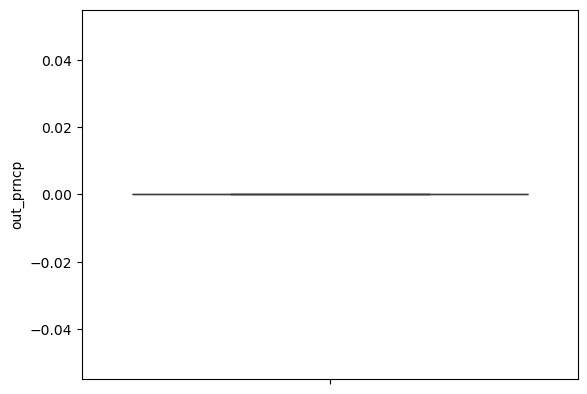

In [173]:
sns.boxplot(data=df1, y='out_prncp')

In [174]:
df1['out_prncp'].unique()

array([0.])

In [175]:
df1['out_prncp_inv'].unique()

array([0.])

In [176]:
df1=df1.drop('out_prncp', axis=1)
df1=df1.drop('out_prncp_inv', axis=1)

### <span style="color:green">  Though the features 'out_prncp', 'out_prncp_inv' are having more information accumulated towards the beginning, deleting the outliers might cause problems as these columns indicate the outstanding amount pending from Principal amount. We will keep the rows.

### <span style="color:green">  We can delete these features altogether at a leter point in time if needed

<Axes: ylabel='total_rec_late_fee'>

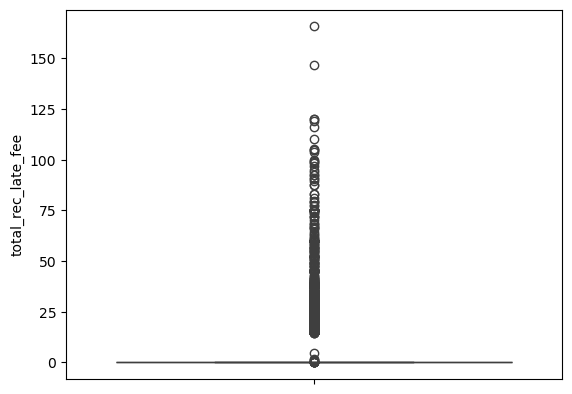

In [177]:
sns.boxplot(data=dfn,y='total_rec_late_fee')

In [178]:
l = find_iqr(df, 'total_rec_late_fee')

25th Percentile of total_rec_late_fee is 0.0
75th Percentile of total_rec_late_fee is 0.0
IQR of total_rec_late_fee is 0.0
Lower Range for total_rec_late_fee 0.0
Upper Range for total_rec_late_fee 0.0


In [179]:
df1['total_rec_late_fee'].unique()

array([ 0.        , 16.97      , 15.00000003, ...,  1.69      ,
        1.36      , 19.89      ])

In [180]:
l = find_iqr(df1, 'total_rec_late_fee')

25th Percentile of total_rec_late_fee is 0.0
75th Percentile of total_rec_late_fee is 0.0
IQR of total_rec_late_fee is 0.0
Lower Range for total_rec_late_fee 0.0
Upper Range for total_rec_late_fee 0.0


In [181]:
l

[True, 0.0, 0.0]

In [182]:
df1[df1['total_rec_late_fee'] > l[2]]['total_rec_late_fee'].count()

1687

In [183]:
df1[df1['total_rec_late_fee'] < l[1]]['total_rec_late_fee'].count()

0

In [184]:
df1 = df1[df1['total_rec_late_fee'] <= l[2]]

<Axes: ylabel='total_rec_late_fee'>

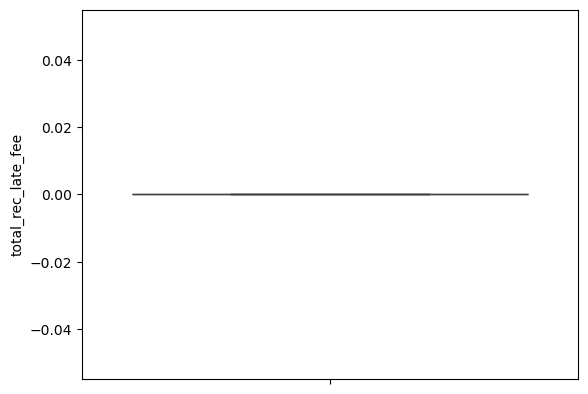

In [185]:
sns.boxplot(data=df1,y='total_rec_late_fee')

In [186]:
df1['total_rec_late_fee'].unique()

array([0.])

In [187]:
df1=df1.drop('total_rec_late_fee', axis=1)

### <span style="color:green">  Similar pattern, we will retain the column. In df1, it's showing all 0's

### <span style="color:green"> 'recoveries', 'collection_recovery_fee', 'policy_code', 'acc_now_delinq', 'delinq_amnt' and 'pub_rec_bankruptcies

<Axes: ylabel='recoveries'>

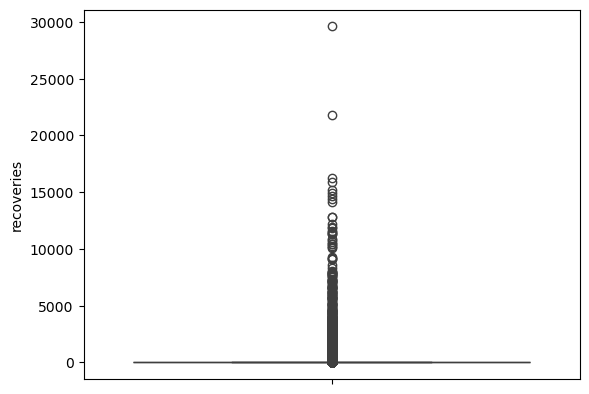

In [188]:
sns.boxplot(data=dfn,y='recoveries')

<Axes: ylabel='recoveries'>

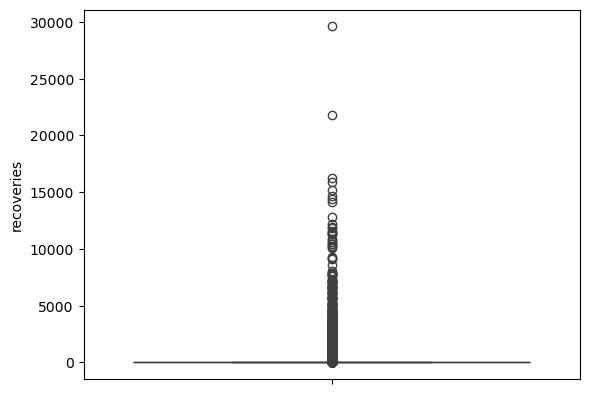

In [189]:
sns.boxplot(data=df1,y='recoveries')

In [190]:
df1['recoveries'].unique()

array([117.08,   0.  , 269.29, ..., 102.91, 304.2 ,  21.29])

In [191]:
l = find_iqr(df1, 'recoveries')

25th Percentile of recoveries is 0.0
75th Percentile of recoveries is 0.0
IQR of recoveries is 0.0
Lower Range for recoveries 0.0
Upper Range for recoveries 0.0


In [192]:
l

[True, 0.0, 0.0]

In [193]:
df1[df1['recoveries'] > l[2]]['recoveries'].count()

2907

In [194]:
df1[df1['recoveries'] < l[1]]['recoveries'].count()

0

In [195]:
df1 = df1[df1['recoveries'] <= l[2]]

<Axes: ylabel='recoveries'>

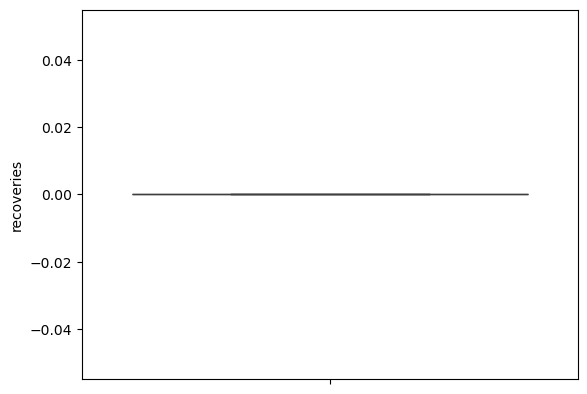

In [196]:
sns.boxplot(data=df1,y='recoveries')

In [197]:
df1['recoveries'].unique()

array([0.])

In [198]:
df1=df1.drop('recoveries', axis=1)

### <span style="color:green">  Similar pattern, we will retain the column. In df1, it's showing all 0's

<Axes: ylabel='collection_recovery_fee'>

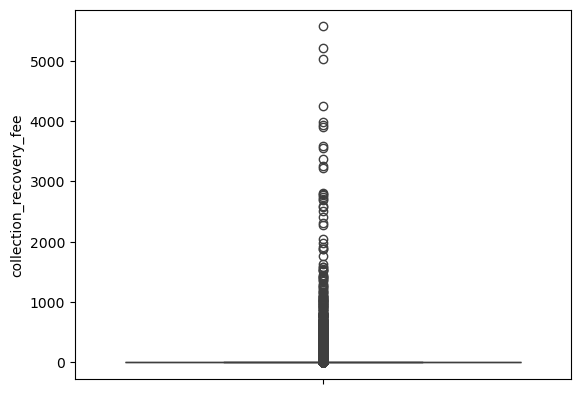

In [199]:
sns.boxplot(data=dfn,y='collection_recovery_fee')

<Axes: ylabel='collection_recovery_fee'>

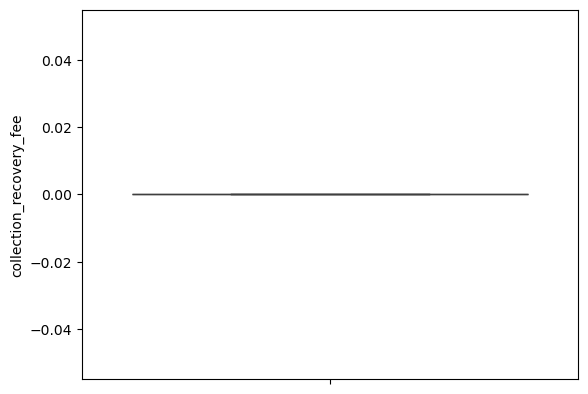

In [200]:
sns.boxplot(data=df1,y='collection_recovery_fee')

In [201]:
df1['collection_recovery_fee'].unique()

array([0.])

In [202]:
df1=df1.drop('collection_recovery_fee', axis=1)

### <span style="color:green">  In df1, it's showing all 0's for this column as well

<Axes: ylabel='policy_code'>

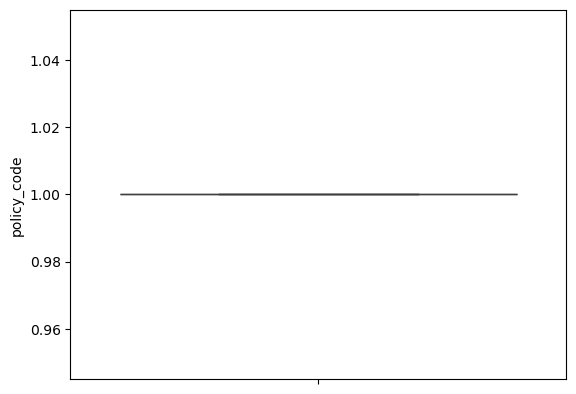

In [203]:
sns.boxplot(data=dfn,y='policy_code')

<Axes: ylabel='acc_now_delinq'>

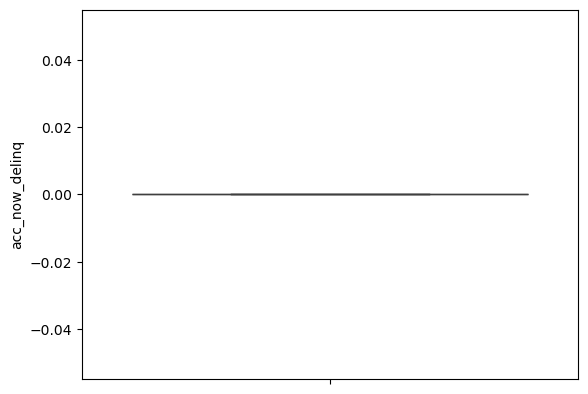

In [204]:
sns.boxplot(data=dfn,y='acc_now_delinq')

<Axes: ylabel='delinq_amnt'>

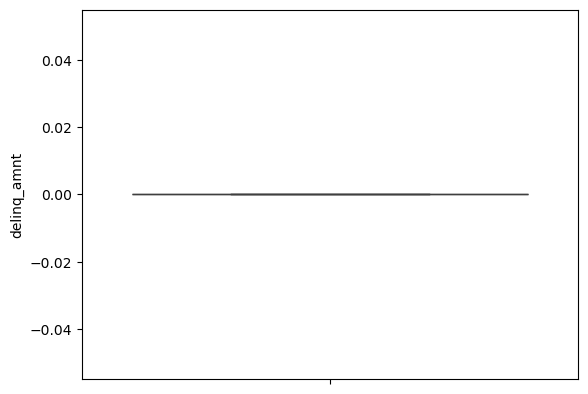

In [205]:
sns.boxplot(data=dfn,y='delinq_amnt')

<Axes: ylabel='pub_rec_bankruptcies'>

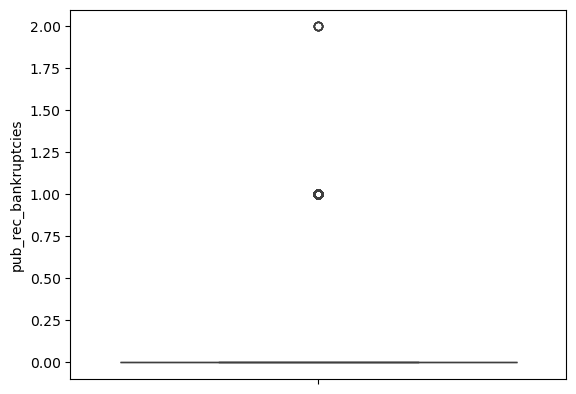

In [206]:
sns.boxplot(data=dfn,y='pub_rec_bankruptcies')

In [207]:
df['policy_code'].unique()

array([1], dtype=int64)

In [208]:
df['acc_now_delinq'].unique()

array([0], dtype=int64)

In [209]:
df['delinq_amnt'].unique()

array([0], dtype=int64)

In [210]:
df['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

### <span style="color:green">  We can delete the 3 columns i.e. 'policy_code', 'acc_now_delinq' and 'delinq_amnt'. Also, we will convert the column 'pub_rec_bankruptcies' to categorical

In [211]:
df = df.drop('policy_code', axis=1)
df1=df1.drop('policy_code', axis=1)

In [212]:
df = df.drop('acc_now_delinq', axis=1)
df1=df1.drop('acc_now_delinq', axis=1)

In [213]:
df = df.drop('delinq_amnt', axis=1)
df1=df1.drop('delinq_amnt', axis=1)

In [214]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('object')
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].astype('object')

In [215]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

In [216]:
dfn.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.423700e+04,3.423700e+04,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000
mean,6.807441e+05,8.474886e+05,10313.145135,10049.506382,9560.290657,11.902062,295.869982,60785.532060,13.528339,0.857756,9.198732,0.055612,12129.704121,48.860538,21.600199,45.410984,45.175349,11163.592077,10633.272131,9037.010898,2045.277581,1.235835,80.067842,9.694511,2467.496060
std,2.100875e+05,2.653913e+05,6374.462936,6055.166199,6040.820175,3.645014,168.599399,27427.542143,6.652140,1.055384,4.328949,0.238787,13361.299791,28.137267,11.150700,330.871524,329.478654,7678.354452,7622.373014,6012.447066,2232.013474,6.491207,573.649621,114.955695,3951.626881
min,5.574200e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000
25%,5.165060e+05,6.672110e+05,5000.000000,5000.000000,5000.000000,8.940000,163.520000,40000.000000,8.450000,0.000000,6.000000,0.000000,3623.000000,25.800000,13.000000,0.000000,0.000000,5490.586946,5018.590000,4500.000000,642.870000,0.000000,0.000000,0.000000,215.220000
50%,6.613290e+05,8.455590e+05,9200.000000,9000.000000,8375.000000,11.710000,268.320000,55920.000000,13.650000,1.000000,8.000000,0.000000,8522.000000,49.200000,20.000000,0.000000,0.000000,9427.356129,8886.950000,8000.000000,1277.600000,0.000000,0.000000,0.000000,514.050000
75%,8.336630e+05,1.042952e+06,14400.000000,14000.000000,13000.000000,14.270000,396.470000,76365.000000,18.800000,1.000000,12.000000,0.000000,15942.000000,72.100000,28.000000,0.000000,0.000000,15277.840000,14630.260000,12175.000000,2561.570000,0.000000,0.000000,0.000000,3177.540000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,790.490000,145008.000000,29.990000,8.000000,42.000000,4.000000,149000.000000,99.900000,90.000000,5286.980000,5283.190000,47367.629920,46668.720000,35000.000000,17704.040000,165.690000,29623.350000,5569.920000,35339.050000


In [217]:
dfn1 = df1.select_dtypes(include=[np.number])
dfc1 = df1.select_dtypes(exclude=[np.number])

In [218]:
dfn1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,2.869200e+04,2.869200e+04,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000,28692.000000
mean,6.721810e+05,8.372275e+05,10065.179318,9816.843545,9343.527327,11.528564,293.160986,61379.293789,13.440256,0.837411,9.228531,0.053116,12105.947512,47.755351,21.806183,11410.228232,10869.504930,9527.534274,1882.694052,2841.704991
std,2.071065e+05,2.623466e+05,6161.473967,5869.935001,5847.264426,3.544789,167.355610,27491.827498,6.642070,1.043819,4.321450,0.233705,13408.369677,28.036247,11.191031,7481.804554,7429.685106,5903.984639,2018.538402,4171.990894
min,5.574200e+04,8.035300e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.200000
25%,5.114890e+05,6.602080e+05,5000.000000,5000.000000,4975.000000,8.490000,162.730000,40000.000000,8.360000,0.000000,6.000000,0.000000,3605.000000,24.500000,13.000000,5800.460782,5442.582500,5000.000000,622.447500,243.647500
50%,6.500155e+05,8.309500e+05,9000.000000,9000.000000,8000.000000,11.480000,263.780000,56700.000000,13.530000,1.000000,9.000000,0.000000,8487.000000,47.800000,20.000000,9862.064949,9284.750000,8400.000000,1216.660000,715.830000
75%,8.209838e+05,1.028804e+06,14000.000000,13225.000000,12600.000000,13.920000,392.502500,77729.050000,18.680000,1.000000,12.000000,0.000000,15863.250000,70.800000,28.000000,15457.816867,14808.105000,13000.000000,2369.807500,3935.125000
max,1.075269e+06,1.311441e+06,35000.000000,35000.000000,35000.000000,24.110000,790.490000,145008.000000,29.990000,8.000000,42.000000,4.000000,149000.000000,99.900000,90.000000,47367.629920,46668.720000,35000.000000,17704.040000,35339.050000


### <span style="color:green">  We have handled outliers for some features and for few others, we have retained them

### <span style="color:green">  Now, let's start exploring the features with histograms

<Axes: xlabel='loan_amnt', ylabel='Count'>

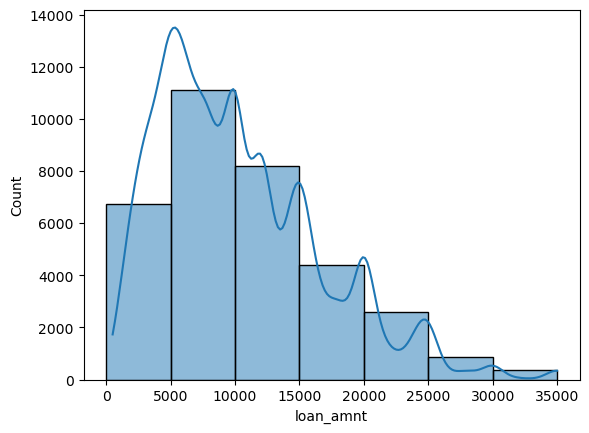

In [219]:
bins=[i for i in range(0,40000,5000)]
sns.histplot(data=dfn, x='loan_amnt',bins=bins, kde=True)

### <span style="color:green">  Most of the loan amounts are 5000-15000 range

<Axes: xlabel='funded_amnt', ylabel='Count'>

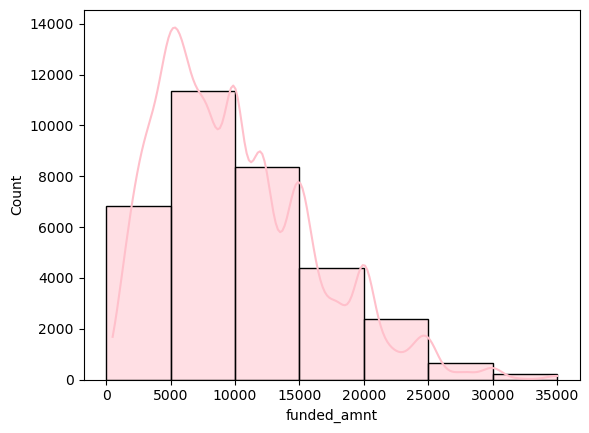

In [220]:
bins=[i for i in range(0,40000,5000)]
sns.histplot(data=dfn, x='funded_amnt',bins=bins, kde=True, color='pink')

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

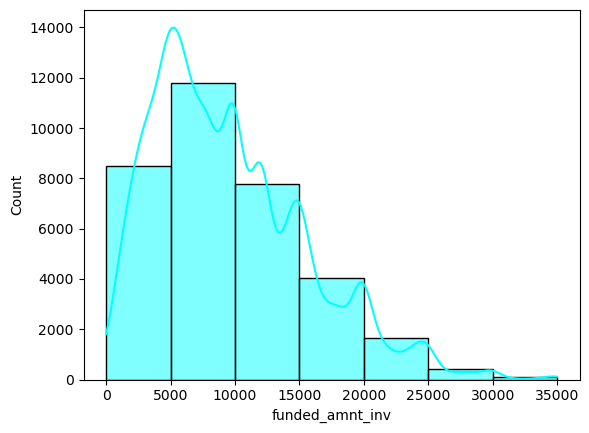

In [221]:
bins=[i for i in range(0,40000,5000)]
sns.histplot(data=dfn, x='funded_amnt_inv',bins=bins, kde=True, color='cyan')

### <span style="color:green">  Similar pattern is seen for funded_amount and funded_amnt_inv as well

<Axes: xlabel='int_rate', ylabel='Count'>

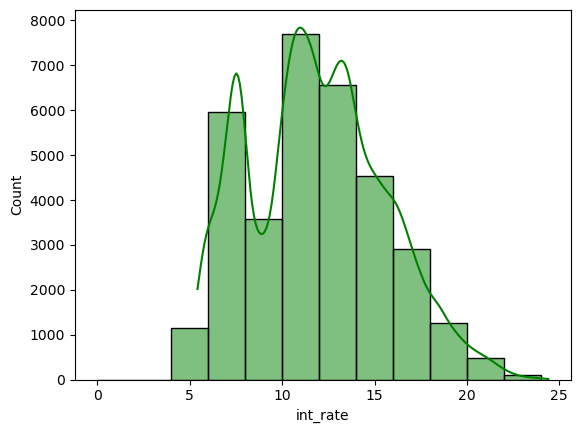

In [222]:
bins=[i for i in range(0,25,2)]
sns.histplot(data=dfn, x='int_rate',bins=bins, kde=True, color='green')

### <span style="color:green">  Interest rates are mostly between 10-15

<Axes: xlabel='installment', ylabel='Count'>

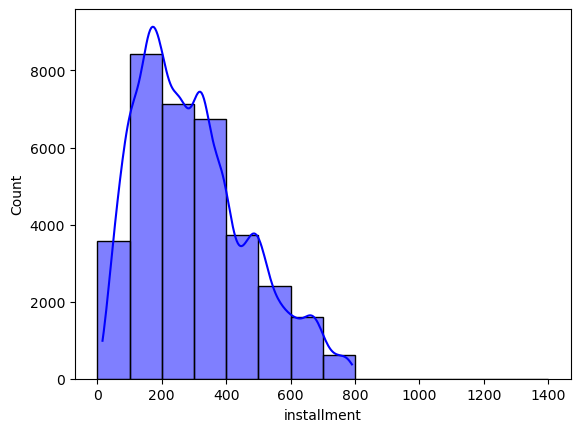

In [223]:
bins=[i for i in range(0,1500,100)]
sns.histplot(data=dfn, x='installment',bins=bins, kde=True, color='blue')

<Axes: xlabel='annual_inc', ylabel='Count'>

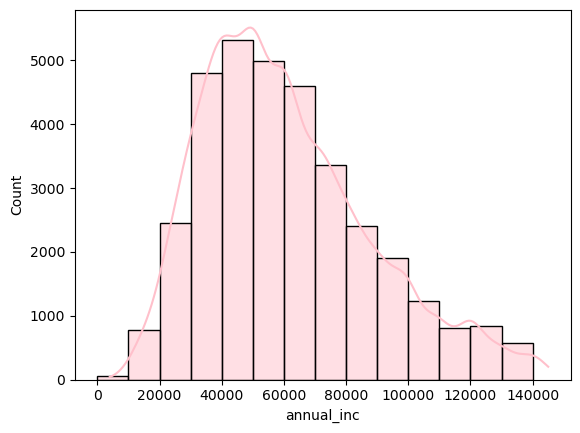

In [224]:
bins=[i for i in range(0,150000,10000)]
sns.histplot(data=dfn, x='annual_inc',bins=bins, kde=True, color='pink')

## <span style="color:blue"> Let's plot the rest of the histograms

In [225]:
dfn.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.423700e+04,3.423700e+04,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000,34237.000000
mean,6.807441e+05,8.474886e+05,10313.145135,10049.506382,9560.290657,11.902062,295.869982,60785.532060,13.528339,0.857756,9.198732,0.055612,12129.704121,48.860538,21.600199,45.410984,45.175349,11163.592077,10633.272131,9037.010898,2045.277581,1.235835,80.067842,9.694511,2467.496060
std,2.100875e+05,2.653913e+05,6374.462936,6055.166199,6040.820175,3.645014,168.599399,27427.542143,6.652140,1.055384,4.328949,0.238787,13361.299791,28.137267,11.150700,330.871524,329.478654,7678.354452,7622.373014,6012.447066,2232.013474,6.491207,573.649621,114.955695,3951.626881
min,5.574200e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000
25%,5.165060e+05,6.672110e+05,5000.000000,5000.000000,5000.000000,8.940000,163.520000,40000.000000,8.450000,0.000000,6.000000,0.000000,3623.000000,25.800000,13.000000,0.000000,0.000000,5490.586946,5018.590000,4500.000000,642.870000,0.000000,0.000000,0.000000,215.220000
50%,6.613290e+05,8.455590e+05,9200.000000,9000.000000,8375.000000,11.710000,268.320000,55920.000000,13.650000,1.000000,8.000000,0.000000,8522.000000,49.200000,20.000000,0.000000,0.000000,9427.356129,8886.950000,8000.000000,1277.600000,0.000000,0.000000,0.000000,514.050000
75%,8.336630e+05,1.042952e+06,14400.000000,14000.000000,13000.000000,14.270000,396.470000,76365.000000,18.800000,1.000000,12.000000,0.000000,15942.000000,72.100000,28.000000,0.000000,0.000000,15277.840000,14630.260000,12175.000000,2561.570000,0.000000,0.000000,0.000000,3177.540000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,790.490000,145008.000000,29.990000,8.000000,42.000000,4.000000,149000.000000,99.900000,90.000000,5286.980000,5283.190000,47367.629920,46668.720000,35000.000000,17704.040000,165.690000,29623.350000,5569.920000,35339.050000


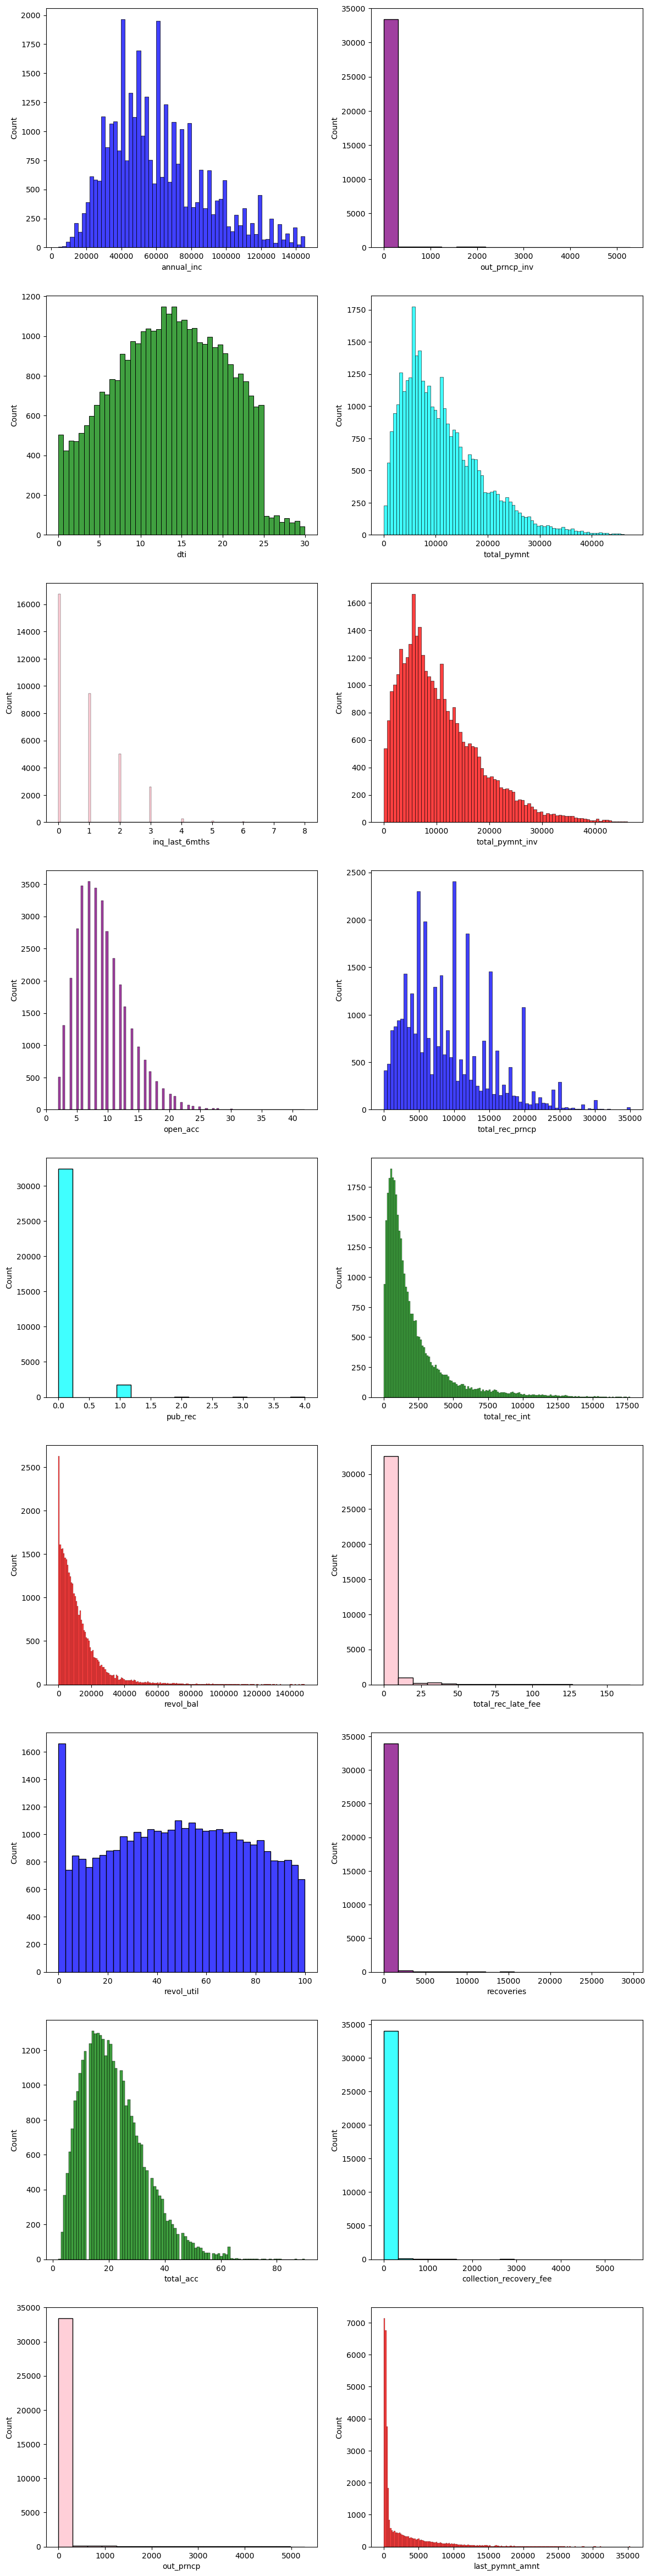

In [226]:
fig, ax = plt.subplots(9,2, figsize=(14,60))
lst = ['annual_inc','dti','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
color = ['blue','green','pink','purple','cyan','red']
x=0
y=0
c=0
for i in lst:
    sns.histplot(data=df, x=i, ax=ax[x,y],color=color[c])
    if (x < 8):
        x += 1
    else:
        x = 0
        y += 1
    if (c >= 5):
        c = 0
    else:
        c += 1


## <span style="color:green"> We can see that few of the variable still show trends like categorical variables, Let us examine

In [227]:
df['inq_last_6mths'].unique()

array([5, 1, 0, 3, 2, 4, 6, 7, 8], dtype=int64)

In [228]:
df['pub_rec'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [229]:
df['out_prncp'].unique()

array([   0.  ,  524.06, 1849.1 , 2181.42, 2637.34, 3125.79, 1041.99,
       3033.28, 1941.27, 2235.1 , 3009.73, 3572.17, 2168.19, 3282.  ,
       3578.62, 4860.84, 3500.97, 3730.24, 3467.1 ,  584.28, 2733.54,
       2851.4 ,  775.8 , 2789.32, 4305.61, 3135.62, 2399.66, 2245.8 ,
       2410.09, 1998.59, 1512.19, 2970.39,  498.84, 2963.24, 3547.11,
        612.96, 3916.99, 2088.78, 1262.94, 1311.75, 3293.77, 3175.31,
       4337.79, 2977.79, 1795.27, 1608.01, 2468.75, 2366.06, 1263.01,
       1841.1 , 1880.75, 2197.15, 1143.7 , 2139.9 , 3307.37, 3506.46,
       2393.54,  757.34, 3247.37, 2441.54, 3795.57, 2069.09,  829.39,
       1634.83, 1128.52, 2169.29, 4064.35, 3399.59, 1393.68, 2835.14,
       2888.66, 4049.43, 2158.43, 1551.4 , 3816.06, 3242.49, 3284.78,
       1990.89, 3426.68, 3373.38, 1913.37, 1202.1 , 3298.03,  952.95,
       2429.04, 1918.47, 3393.3 ,  815.07, 4448.53, 3541.14, 3247.14,
       1323.48, 2988.98, 1828.12, 3449.06, 4124.43, 1717.73, 5217.87,
       3357.63, 1146

In [230]:
df['out_prncp_inv'].unique()

array([   0.  ,  524.06, 1844.43, 2177.03, 2632.59, 3120.68, 1041.99,
       3033.28, 1897.5 , 2178.56, 3009.73, 3567.34, 2168.19, 3277.36,
       3569.68, 4855.89, 3500.97, 3725.49, 3467.1 ,  584.28, 2733.54,
       2847.01,  775.8 , 2785.39, 4301.26, 3131.63, 2395.9 , 2242.04,
       2410.09, 1994.24, 1512.19, 2966.01,  498.84, 2963.24, 3547.11,
        610.88, 3916.99, 2088.78, 1262.94, 1311.75, 3289.97, 3171.55,
       4337.79, 2977.79, 1795.27, 1608.01, 2468.75, 2366.06, 1263.01,
       1841.1 , 1880.75, 2197.15, 1143.7 , 2139.9 , 3307.37, 3502.02,
       2393.54,  757.34, 3247.37, 2437.99, 3791.22, 2069.09,  829.39,
       1634.83, 1128.52, 2166.81, 4064.35, 3395.31, 1388.76, 2835.14,
       2888.66, 4044.6 , 2158.43, 1546.95, 3816.06, 3242.49, 3284.78,
       1990.89, 3422.81, 3373.38, 1913.37, 1202.1 , 3298.03,  952.95,
       2429.04, 1911.33, 3393.3 ,  815.07, 4444.15, 3541.14, 3243.04,
       1323.48, 2981.46, 1828.12, 3449.06, 4116.84, 1717.73, 5214.11,
       3353.75, 1146

In [231]:
df['total_rec_late_fee'].unique()

array([ 0.        , 16.97      , 15.00000003, ...,  1.69      ,
        1.36      , 19.89      ])

In [232]:
df['recoveries'].unique()

array([117.08,   0.  , 269.29, ..., 304.2 ,  35.7 ,  21.29])

In [233]:
df['collection_recovery_fee'].unique()

array([1.1100e+00, 0.0000e+00, 2.5200e+00, ..., 1.2488e+02, 6.6836e+02,
       2.3000e-01])

### <span style="color:green"> Only 2 variables i.e. inq_last_6mths and pub_rec seem categorical. Let's convert them.

In [234]:
df['inq_last_6mths'] = df['inq_last_6mths'].astype('object')
df['pub_rec'] = df['pub_rec'].astype('object')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34237 entries, 1 to 39716
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        34237 non-null  int64  
 1   member_id                 34237 non-null  int64  
 2   loan_amnt                 34237 non-null  int64  
 3   funded_amnt               34237 non-null  int64  
 4   funded_amnt_inv           34237 non-null  float64
 5   term                      34237 non-null  object 
 6   int_rate                  34237 non-null  float64
 7   installment               34237 non-null  float64
 8   grade                     34237 non-null  object 
 9   sub_grade                 34237 non-null  object 
 10  emp_title                 34237 non-null  object 
 11  emp_length                34237 non-null  object 
 12  home_ownership            34237 non-null  object 
 13  annual_inc                34237 non-null  float64
 14  verificatio

## <span style="color:red"> Let's for once check the target variable and the distribution in df and df1

In [236]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

<Axes: xlabel='loan_status'>

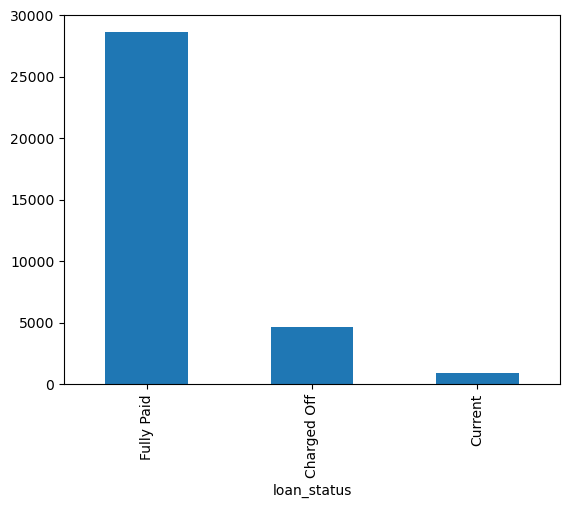

In [237]:
df['loan_status'].value_counts().plot(kind='bar')

<Axes: xlabel='loan_status'>

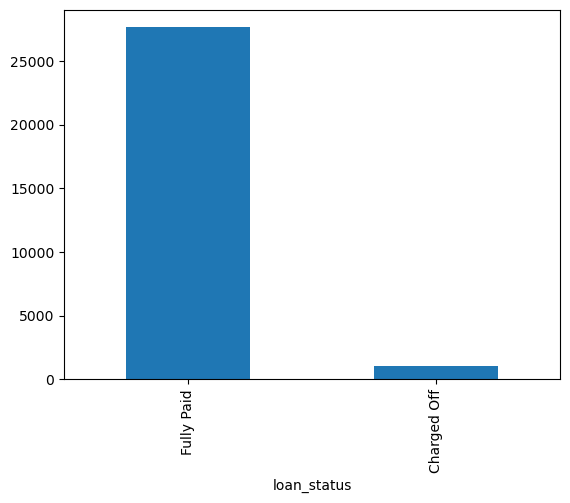

In [238]:
df1['loan_status'].value_counts().plot(kind='bar')

In [239]:
df['loan_status'].value_counts()

loan_status
Fully Paid     28618
Charged Off     4668
Current          951
Name: count, dtype: int64

In [240]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     27636
Charged Off     1056
Name: count, dtype: int64

## <span style="color:red"><u> We can see that the target variable is heavily impacted by the removal of outliers for few variables. We will stick to the original dataset i.e. df and discard df1</u>

### <span style="color:green"> Now, let's turn our attention to Categorical Variables

In [241]:
dfn = df.select_dtypes(include=[np.number])
dfc = df.select_dtypes(exclude=[np.number])

In [242]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34237 entries, 1 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   term                      34237 non-null  object
 1   grade                     34237 non-null  object
 2   sub_grade                 34237 non-null  object
 3   emp_title                 34237 non-null  object
 4   emp_length                34237 non-null  object
 5   home_ownership            34237 non-null  object
 6   verification_status       34237 non-null  object
 7   issued                    34237 non-null  object
 8   loan_status               34237 non-null  object
 9   url                       34237 non-null  object
 10  purpose                   34237 non-null  object
 11  zip_code                  34237 non-null  object
 12  addr_state                34237 non-null  object
 13  delinq_2yrs               34237 non-null  object
 14  earliest_cr_line          3

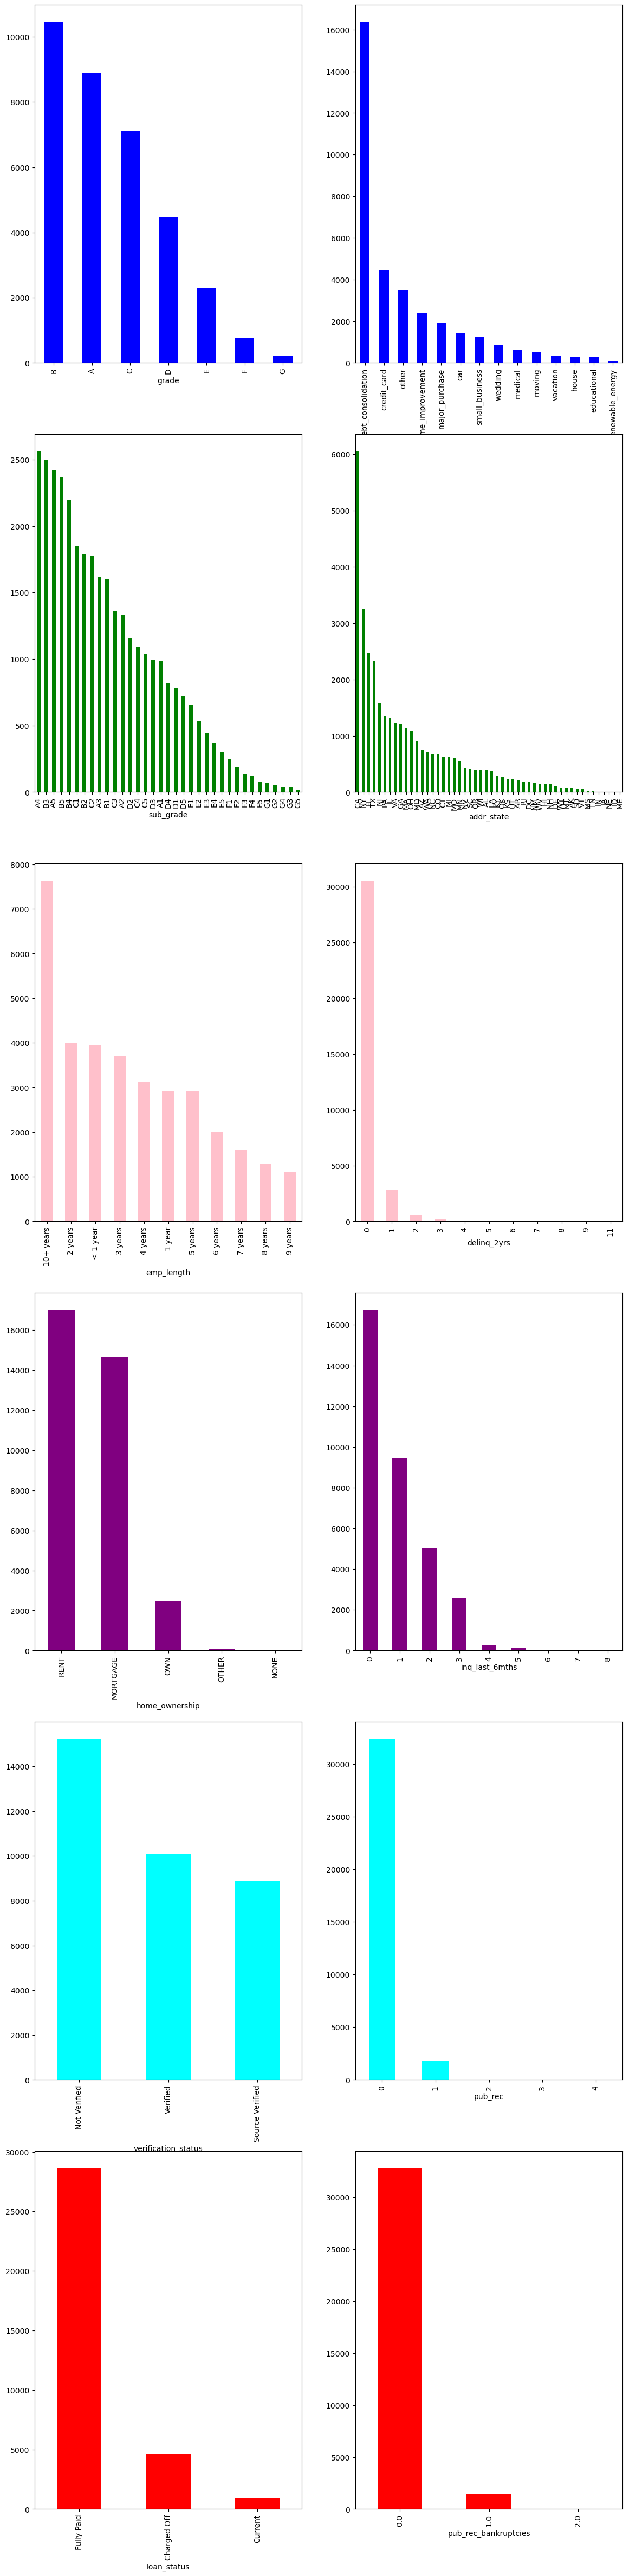

In [243]:
fig, ax = plt.subplots(6,2, figsize=(14,60))
lst = ['grade','sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies']
color = ['blue','green','pink','purple','cyan','red']
x=0
y=0
c=0
for i in lst:
    df[i].value_counts().plot(kind='bar',ax=ax[x][y],color=color[c])
    if (x < 5):
        x += 1
    else:
        x = 0
        y += 1
    if (c >= 5):
        c = 0
    else:
        c += 1

## <span style="color:red"><u>The distribution looks satisfactory across the dataset. Now, let's move to BiVariate Analysis</u>

### <span style="color:green"> Let's plot heatmap for the dfn dataset

<Axes: >

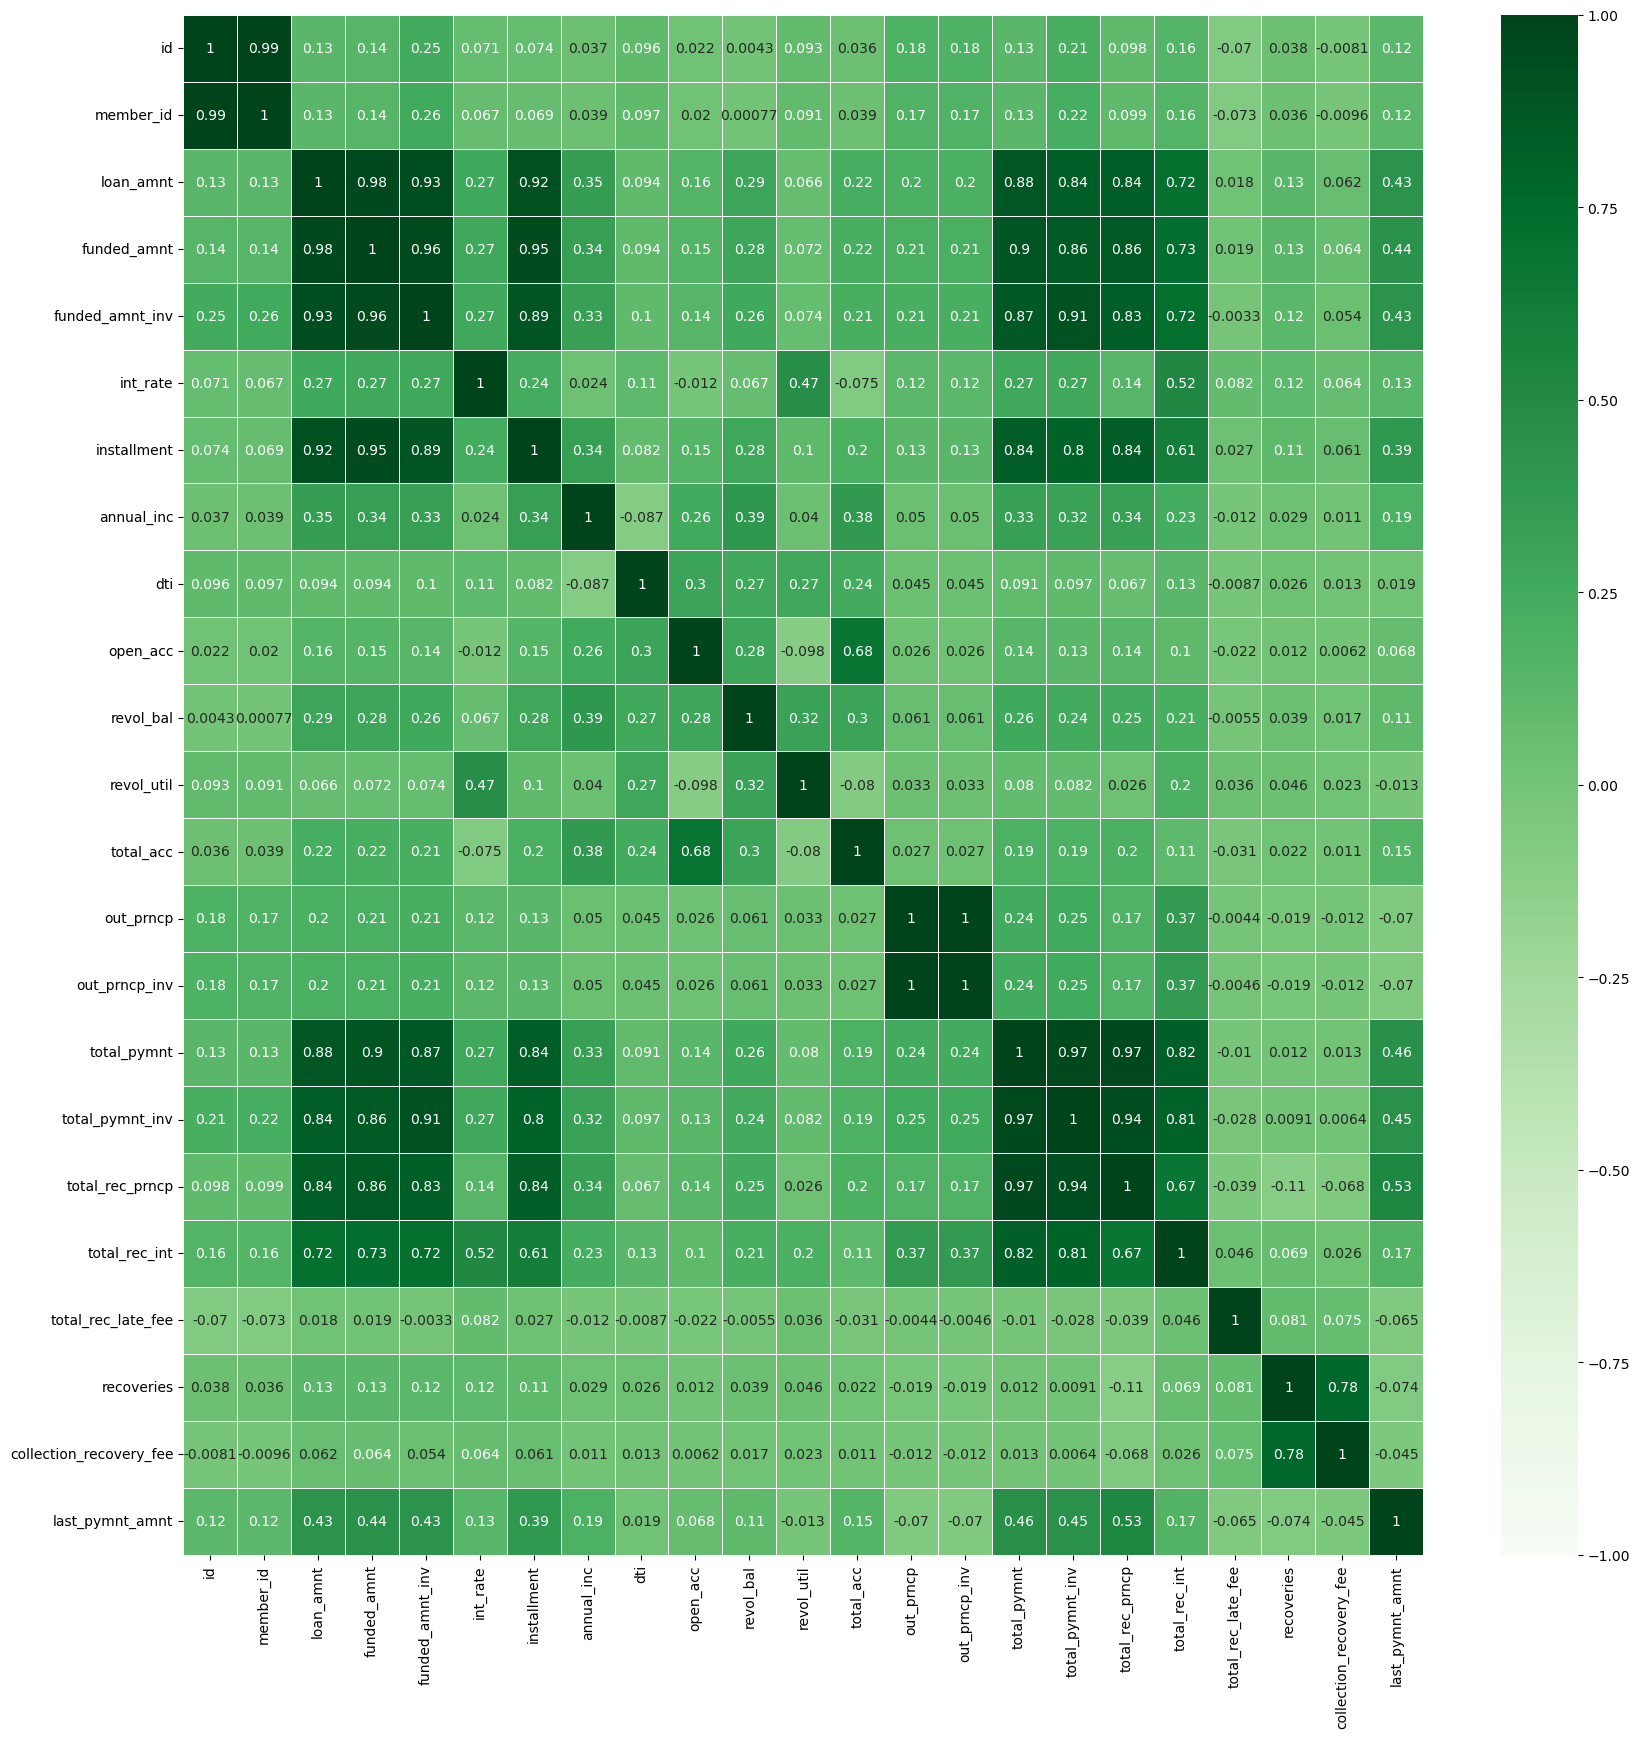

In [244]:
plt.figure(figsize=(20,20))
sns.heatmap(data=dfn.corr(),annot=True,vmin=-1,vmax=1,cmap="Greens",linewidth=.5)

### <span style="color:green"> Extreme negative correlation is absent in the dataset

### <span style="color:green"> Some other inferences:

#### <span style="color:green"> Total Payment Received has a high Correlation with Locan and Funded Amount. More is the Loan/Funded Amount, more is the payment received.

#### <span style="color:green"> But Loan/Funded Amount has relatively lesser (as compared to Payment Received) correlation with Received Interest Amount.

#### <span style="color:green"> One surprising very high (perfect 1) correlation exists between Outstanding Principal Amount for Total Amount Funded and Total Amount Funded by Investors.


#### <span style="color:green">  Let's now plot some categorical variables against others

<Axes: xlabel='loan_status'>

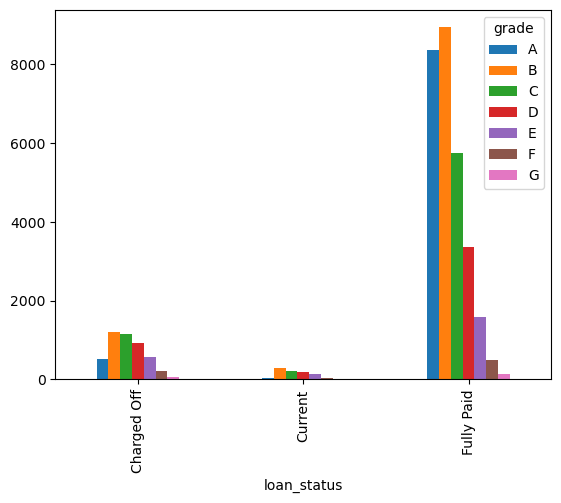

In [253]:
ct = pd.crosstab(index=df['loan_status'], columns=df['grade'])
ct.plot.bar()

#### <span style="color:green">  Grade-B and Grade-C tops the Defaults chart.

<Axes: xlabel='loan_status'>

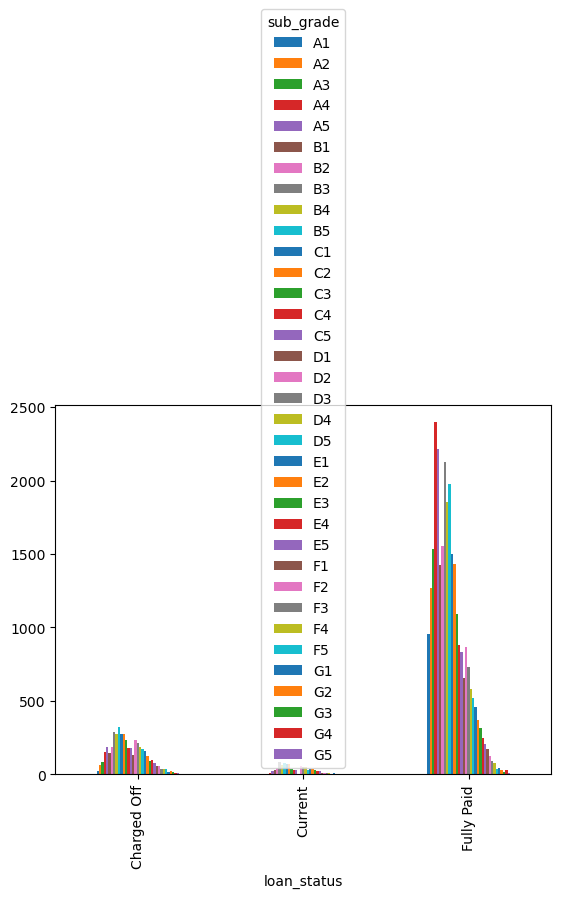

In [254]:
ct = pd.crosstab(index=df['loan_status'], columns=df['sub_grade'])
ct.plot.bar()

<Axes: xlabel='loan_status'>

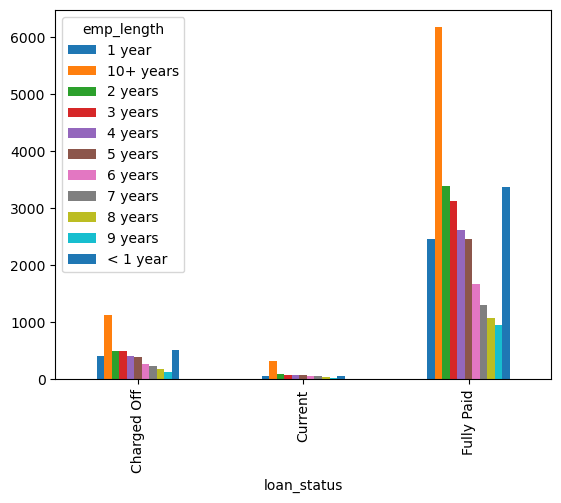

In [255]:
ct = pd.crosstab(index=df['loan_status'], columns=df['emp_length'])
ct.plot.bar()

#### <span style="color:green">  Employment Length more than 10 years has the maximum loan status as "Charged off"

#### <span style="color:green"> Let's plot the rest of the categorical variables

In [258]:
cat_cols = list(dfc.columns)

In [260]:
len(cat_cols)

28

In [266]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issued',
 'loan_status',
 'url',
 'purpose',
 'zip_code',
 'addr_state',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'pub_rec',
 'last_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies',
 'issued_month',
 'issued_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'last_pymnt_d_month',
 'last_pymnt_d_year',
 'last_credit_pull_d_month',
 'last_credit_pull_d_year']

In [267]:
cat_cols.remove('emp_title')

In [268]:
cat_cols.remove('issued')

In [269]:
cat_cols.remove('url')

In [272]:
cat_cols.remove('last_pymnt_d')

In [274]:
cat_cols.remove('last_credit_pull_d')

In [276]:
cat_cols.remove('earliest_cr_line')

In [280]:
cat_cols.remove('zip_code')

In [285]:
cat_cols.remove('grade')

In [286]:
cat_cols.remove('sub_grade')

In [288]:
cat_cols.remove('emp_length')

In [289]:
cat_cols

['term',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies',
 'issued_month',
 'issued_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'last_pymnt_d_month',
 'last_pymnt_d_year',
 'last_credit_pull_d_month',
 'last_credit_pull_d_year']

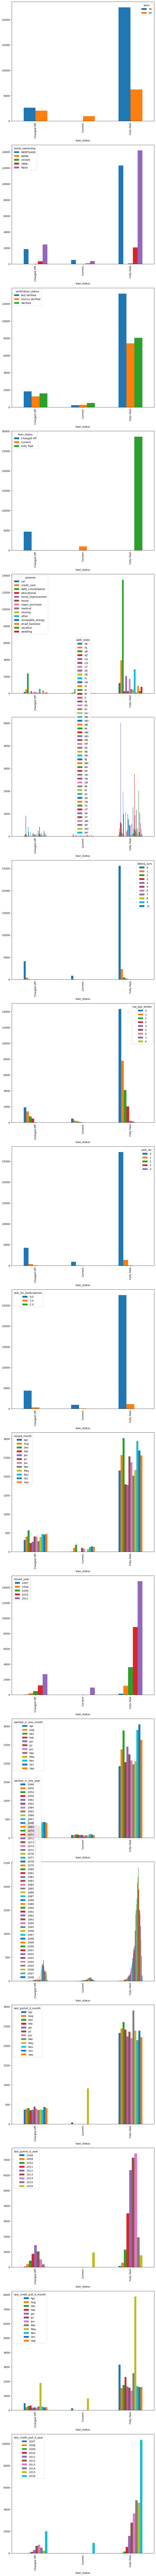

In [294]:
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 180))
for i, col in enumerate(cat_cols):
    ct = pd.crosstab(index=df['loan_status'], columns=df[col])
    ct.plot.bar(ax=axes[i])